In [1]:
import datetime

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)
pd.options.mode.chained_assignment = None

## helper funcs

In [2]:
def plot_min_fare(market_pdf, dd, market):
    trip_df = market_pdf[(market_pdf['out_departure_date'] == dd)] #& (market_pdf['inDeptDt'] == rd)]
    trip_df.sort_values(by='shopDate_dt', inplace=True)
    plt.figure(figsize=(8,3))
    plt.plot(-trip_df['days_til_dept'], trip_df['fare'], marker='o')
    plt.xlabel("advanced purchase days")
    plt.ylabel('min fare (USD)')
    plt.title(f"{market} - depart {dd}");

# load & eval data

In [3]:
DATA_DIR = "../../output/aws-data/modeling/06b/"
df = pd.read_parquet(DATA_DIR)

In [4]:
len(df)

38454

In [5]:
df.head()

,market,out_departure_date,shop_date,fare_rank,num_itin,fare,out_cxrs,solution_counts,shop_counts,avg_out_avail_max,avg_out_avail_low,outDeptDt_dt,shopDate_dt,days_til_dept,dept_dt_dow_int,dept_dt_dow,is_holiday,fr2_fare,fr2_out_cxrs,fr2_avg_out_avail_max,fr2_avg_out_avail_low,fr1_fr2_out_cxrs_same,fr1_fr2_out_cxrs_overlap,avg_fare_dtd,fare_prev_shop_day,fr2_fare_prev_shop_day,avg_out_avail_max_prev_shop_day,avg_out_avail_low_prev_shop_day,num_itin_prev_shop_day,shop_counts_prev_shop_day,solution_counts_prev_shop_day,fare_prev_dept_day,fare_next_dept_day,fare_diff_prev_dept_day,fare_diff_next_dept_day,trailing_avg_shop_counts,trailing_avg_solution_counts,trailing_avg_fare,trailing_std_fare,avg_diff_prev_dept_day,avg_diff_next_dept_day,est_fare_from_prev_dept_day,est_fare_from_next_dept_day,features,prediction,err,abs_err,abs_pct_err,data_split
0,ATL-EWR,20221109,20221103,1,6,43.59,[NK],19223,589,0.166667,0.0,2022-11-09,2022-11-03,6,2,Wed,0,72.59,[NK],0.0,0.0,True,True,56.420000,43.59,72.59,0.1,0.0,10,371,12158,102.59,43.59,-59.00,0.00,297.25,11410.50,43.59,0.000000,-13.315042,-21.068417,89.274958,22.521583,"{'type': 1, 'size': None, 'indices': None, 'va...",55.473032,-11.883032,11.883032,0.272609,test
1,ATL-EWR,20221110,20221105,1,1,93.60,[UA],17344,530,1.000000,0.0,2022-11-10,2022-11-05,5,3,Thu,0,99.91,[UA],1.0,0.0,True,True,65.030000,43.59,79.59,1.0,0.0,1,521,16941,90.91,72.59,2.69,21.01,509.50,15247.75,43.59,0.000000,13.547053,-11.080628,104.457053,61.509372,"{'type': 1, 'size': None, 'indices': None, 'va...",60.535490,33.064510,33.064510,0.353253,test
2,ATL-EWR,20221111,20221103,1,1,72.59,[NK],18095,571,1.000000,0.0,2022-11-11,2022-11-03,8,4,Fri,0,91.58,[NK],1.0,0.0,True,True,50.840000,72.59,91.58,1.0,0.0,1,484,13360,43.59,43.59,29.00,29.00,395.00,11929.75,95.09,15.000000,17.551739,9.995304,61.141739,53.585304,"{'type': 1, 'size': None, 'indices': None, 'va...",76.436802,-3.846802,3.846802,0.052994,test
3,ATL-EWR,20221111,20221104,1,1,72.59,[NK],19089,664,1.000000,0.0,2022-11-11,2022-11-04,7,4,Fri,0,91.58,[NK],1.0,0.0,True,True,66.092000,72.59,91.58,1.0,0.0,1,571,18095,43.59,102.60,29.00,-30.01,459.50,14060.25,87.59,17.320508,13.155590,8.037812,56.745590,110.637812,"{'type': 1, 'size': None, 'indices': None, 'va...",78.443350,-5.853350,5.853350,0.080636,test
4,ATL-EWR,20221111,20221105,1,1,72.59,[NK],17668,577,1.000000,0.0,2022-11-11,2022-11-05,6,4,Fri,0,91.58,[NK],1.0,0.0,True,True,52.143333,72.59,91.58,1.0,0.0,1,664,19089,93.60,43.59,-21.01,29.00,545.00,16279.75,80.09,15.000000,13.975745,9.591283,107.575745,53.181283,"{'type': 1, 'size': None, 'indices': None, 'va...",85.004520,-12.414520,12.414520,0.171022,test


## additional prep

In [6]:
df['num_out_cxr'] = df['out_cxrs'].apply(lambda x: len(x))
df['out_first_cxr'] = df['out_cxrs'].apply(lambda x: x[0])

In [7]:
# df_raw = df.copy()

In [8]:
# df = df[df['fare'] > 5]

In [9]:
df['fare_diff_prev_shop_day'] = df['fare'] - df['fare_prev_shop_day']
df['pct_err'] = df['err'] / df['fare']

In [10]:
for x in df.columns:
    print(x)

market
out_departure_date
shop_date
fare_rank
num_itin
fare
out_cxrs
solution_counts
shop_counts
avg_out_avail_max
avg_out_avail_low
outDeptDt_dt
shopDate_dt
days_til_dept
dept_dt_dow_int
dept_dt_dow
is_holiday
fr2_fare
fr2_out_cxrs
fr2_avg_out_avail_max
fr2_avg_out_avail_low
fr1_fr2_out_cxrs_same
fr1_fr2_out_cxrs_overlap
avg_fare_dtd
fare_prev_shop_day
fr2_fare_prev_shop_day
avg_out_avail_max_prev_shop_day
avg_out_avail_low_prev_shop_day
num_itin_prev_shop_day
shop_counts_prev_shop_day
solution_counts_prev_shop_day
fare_prev_dept_day
fare_next_dept_day
fare_diff_prev_dept_day
fare_diff_next_dept_day
trailing_avg_shop_counts
trailing_avg_solution_counts
trailing_avg_fare
trailing_std_fare
avg_diff_prev_dept_day
avg_diff_next_dept_day
est_fare_from_prev_dept_day
est_fare_from_next_dept_day
features
prediction
err
abs_err
abs_pct_err
data_split
num_out_cxr
out_first_cxr
fare_diff_prev_shop_day
pct_err


## overall performance

In [11]:
df['abs_pct_err'].mean()

0.03888973473843527

In [12]:
np.median(df['abs_pct_err'])

0.011386706041199516

In [13]:
df.groupby("data_split").agg(
    {"abs_pct_err": ['mean', np.median]}
)

abs_pct_err          
                  mean    median
data_split                      
test          0.046410  0.012761
train         0.037018  0.011049

In [14]:
err_by_market = df.groupby("market").agg(
    {"abs_pct_err": ['mean', np.median, 'count']}
)
err_by_market.columns = ['mape', 'median_ape', 'num_shop-dept']
err_by_market.reset_index(inplace=True)

In [15]:
err_by_market.sort_values(by='mape', inplace=True)

In [16]:
err_by_market

,market,mape,median_ape,num_shop-dept
2,EWR-LHR,0.013183,0.001358,2747
10,LHR-JFK,0.015133,0.004412,2747
9,LHR-EWR,0.015772,0.005216,2747
1,EWR-CDG,0.017644,0.008436,2747
4,JFK-LHR,0.025875,0.001923,2747
7,LAX-SFO,0.026629,0.004116,2747
13,SFO-LAX,0.031573,0.007868,2747
11,LHR-LAX,0.036045,0.018285,2747
3,JFK-LAX,0.043020,0.019868,2747
6,LAX-JFK,0.043859,0.019968,2747


## errs by dtd

In [17]:
dtd_errs = df.groupby("days_til_dept").agg(
    {"abs_err": ['mean', 'std'],
    "abs_pct_err": ['mean', 'std']
    })
     

dtd_errs.columns = ['mean_abs_err', 'std_abs_err', 'mape', 'std_ape']
dtd_errs.reset_index(inplace=True)

In [18]:
# dtd_lim = 120
# data_to_plot = dtd_errs[dtd_errs['days_til_dept'] <= dtd_lim]
data_to_plot = dtd_errs.copy()

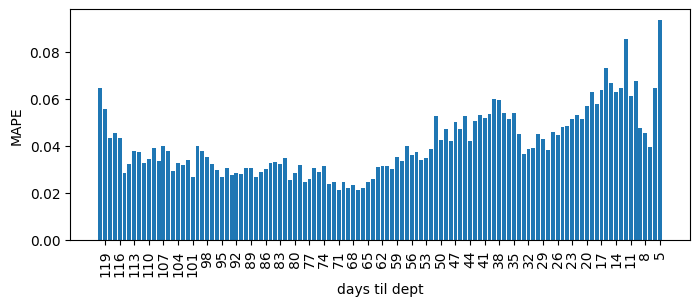

In [19]:
plt.figure(figsize=(8,3))
xs = np.arange(len(data_to_plot))
rev_xs = [-x for x in xs]
plt.bar(rev_xs, data_to_plot['mape'],) #yerr=data_df['std_ape_rf'])
every = 3
plt.xticks(rev_xs[::every], data_to_plot['days_til_dept'][::every], rotation=90)
plt.ylabel("MAPE")
plt.xlabel("days til dept");

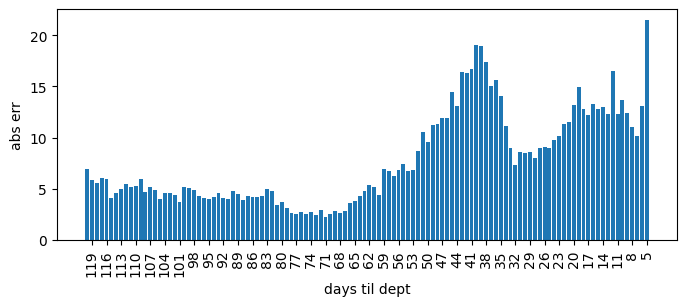

In [20]:
plt.figure(figsize=(8,3))
xs = np.arange(len(data_to_plot))
rev_xs = [-x for x in xs]
plt.bar(rev_xs, data_to_plot['mean_abs_err']) #, yerr=data_to_plot['std_abs_err'])
every = 3
plt.xticks(rev_xs[::every], data_to_plot['days_til_dept'][::every], rotation=90)
plt.ylabel("abs err")
plt.xlabel("days til dept");

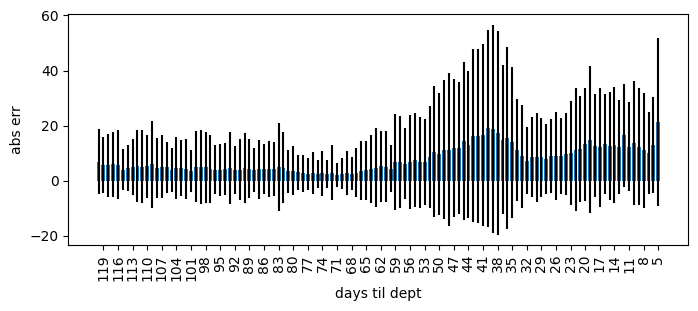

In [21]:
plt.figure(figsize=(8,3))
xs = np.arange(len(data_to_plot))
rev_xs = [-x for x in xs]
plt.bar(rev_xs, data_to_plot['mean_abs_err'], yerr=data_to_plot['std_abs_err'])
every = 3
plt.xticks(rev_xs[::every], data_to_plot['days_til_dept'][::every], rotation=90)
plt.ylabel("abs err")
plt.xlabel("days til dept");

Std dev is crazy large

## err by dept dt

In [22]:
dd_err = df.groupby("out_departure_date").agg(
    {"abs_err": ['mean', 'std'],
    "abs_pct_err": ['mean', 'std']
    })
     
dd_err.columns = ['mean_abs_err', 'std_abs_err', 'mape', 'std_ape']
dd_err.reset_index(inplace=True)

In [23]:
datetime.date.today() + datetime.timedelta(days=120)

datetime.date(2023, 4, 1)

In [24]:
data_to_plot = dd_err[dd_err['out_departure_date'] <= 20230401]

Note there will be discontinuities in the x-axis, b/c we removed holidays

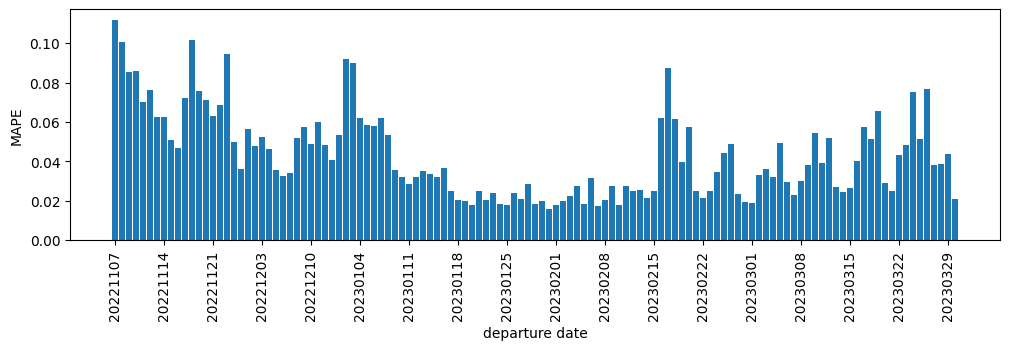

In [25]:
plt.figure(figsize=(12,3))
xs = np.arange(len(data_to_plot))
plt.bar(xs, data_to_plot['mape'],) #yerr=data_df['std_ape_rf'])
every = 7
plt.xticks(xs[::every], data_to_plot['out_departure_date'][::every], rotation=90)
plt.ylabel("MAPE")
plt.xlabel("departure date");

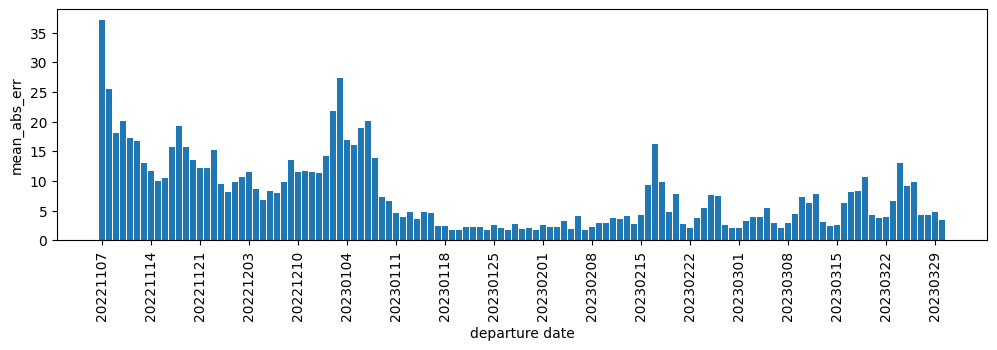

In [26]:
plt.figure(figsize=(12,3))
xs = np.arange(len(data_to_plot))
plt.bar(xs, data_to_plot['mean_abs_err'],) #yerr=data_df['std_ape_rf'])
every = 7
plt.xticks(xs[::every], data_to_plot['out_departure_date'][::every], rotation=90)
plt.ylabel("mean_abs_err")
plt.xlabel("departure date");

## misc

Correlation of error with changes in fares

In [27]:
np.corrcoef(df['fare_diff_prev_shop_day'], df['err'])

array([[1.       , 0.6904757],
       [0.6904757, 1.       ]])

In [28]:
df['pct_fare_diff_prev_shop_day'] = df['fare_diff_prev_shop_day'] / df['fare']

In [29]:
np.corrcoef(df['pct_fare_diff_prev_shop_day'], df['err'])

array([[1.        , 0.34543325],
       [0.34543325, 1.        ]])

# Examine by market

## EWR-LHR

In [30]:
market = 'EWR-LHR'
market_df = df[df['market'] == market]

In [31]:
market_df[['fare', 'abs_err', 'abs_pct_err']].describe()

,fare,abs_err,abs_pct_err
count,2747.000000,2747.000000,2747.000000
mean,320.607390,4.808827,0.013183
std,44.467436,12.021900,0.032376
min,284.400000,0.001045,0.000004
25%,297.200000,0.208234,0.000696
50%,297.500000,0.413592,0.001358
75%,327.300000,2.082770,0.006222
max,602.600000,115.692964,0.349768


In [32]:
x_bar =  market_df['fare'].mean()
sigma =  market_df['fare'].std()

market_df['zscore_fare'] = (market_df['fare'] - x_bar) / sigma

In [33]:
market_df.sort_values(by='abs_err', ascending=False)[
    ['out_departure_date', 'shop_date', 'days_til_dept', 'fare', 'zscore_fare', 'prediction', 'err',
    'shop_counts', 'shop_counts_prev_shop_day']
].head(10)

,out_departure_date,shop_date,days_til_dept,fare,zscore_fare,prediction,err,shop_counts,shop_counts_prev_shop_day
1242,20221214,20221110,34,529.1,4.688658,413.407036,115.692964,550,841
1249,20230103,20221109,55,326.2,0.125769,440.294369,-114.094369,675,657
1219,20221209,20221119,20,439.2,2.666954,335.720668,103.479332,1554,1250
1148,20221120,20221110,10,296.6,-0.539887,389.068461,-92.468461,852,907
12342,20221207,20221127,10,297.6,-0.517399,388.752012,-91.152012,806,1073
12514,20221215,20221104,41,521.3,4.513249,433.820887,87.479113,686,852
12522,20221215,20221112,33,401.7,1.823640,487.637705,-85.937705,831,722
1205,20221206,20221127,9,440.3,2.691691,357.024757,83.275243,1191,1531
12489,20221213,20221130,13,332.5,0.267445,415.070472,-82.570472,1450,1723
12308,20221206,20221116,20,389.2,1.542536,307.545259,81.654741,1508,1929


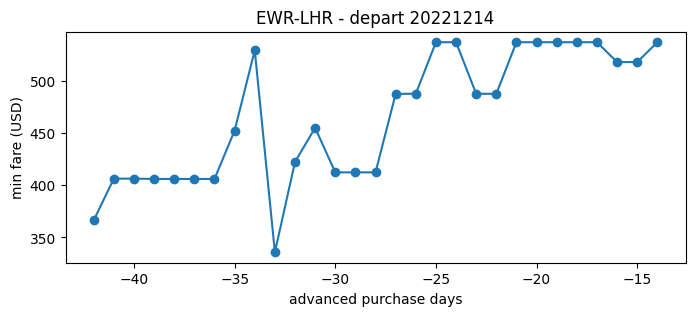

In [34]:
plot_min_fare(market_df, 20221214, market)

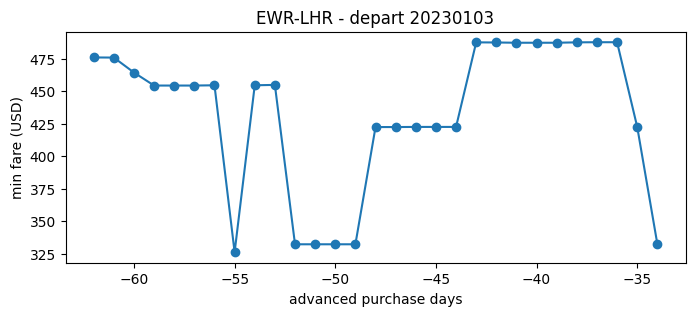

In [35]:
plot_min_fare(market_df, 20230103, market)

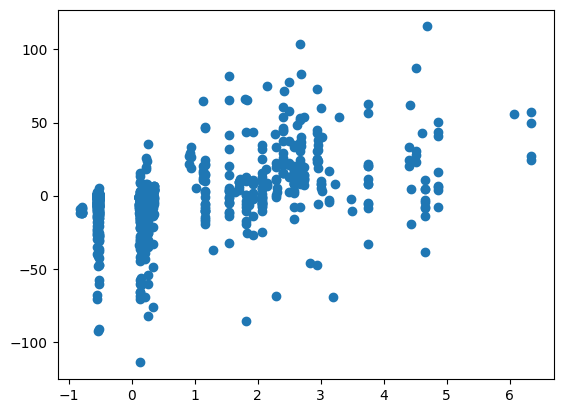

In [36]:
plt.scatter(market_df['zscore_fare'], market_df['err']);

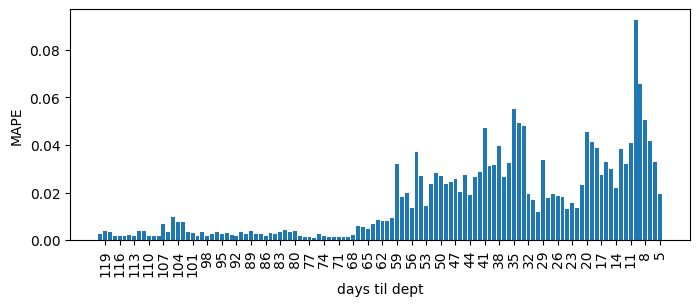

In [37]:
# error by DTD
# =================
dtd_errs = market_df.groupby("days_til_dept").agg(
    {"abs_err": ['mean', 'std'],
    "abs_pct_err": ['mean', 'std']
    })
dtd_errs.columns = ['mean_abs_err', 'std_abs_err', 'mape', 'std_ape']
dtd_errs.reset_index(inplace=True)

data_to_plot = dtd_errs.copy()

plt.figure(figsize=(8,3))
xs = np.arange(len(data_to_plot))
rev_xs = [-x for x in xs]
plt.bar(rev_xs, data_to_plot['mape'],) #yerr=data_df['std_ape_rf'])
every = 3
plt.xticks(rev_xs[::every], data_to_plot['days_til_dept'][::every], rotation=90)
plt.ylabel("MAPE")
plt.xlabel("days til dept");

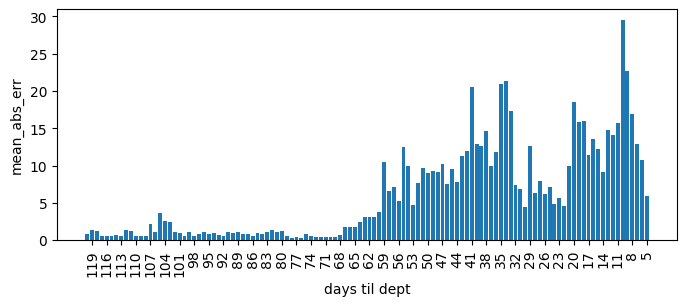

In [38]:
# break
plt.figure(figsize=(8,3))
xs = np.arange(len(data_to_plot))
rev_xs = [-x for x in xs]
plt.bar(rev_xs, data_to_plot['mean_abs_err'],) #yerr=data_df['std_ape_rf'])
every = 3
plt.xticks(rev_xs[::every], data_to_plot['days_til_dept'][::every], rotation=90)
plt.ylabel("mean_abs_err")
plt.xlabel("days til dept");

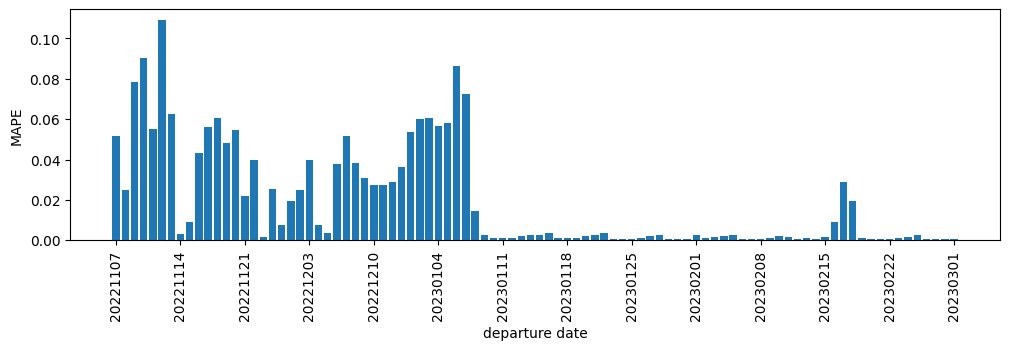

In [39]:
# ERROR BY DEPT DATE
dd_err = market_df.groupby("out_departure_date").agg(
    {"abs_err": ['mean', 'std'],
    "abs_pct_err": ['mean', 'std']
    })
     
dd_err.columns = ['mean_abs_err', 'std_abs_err', 'mape', 'std_ape']
dd_err.reset_index(inplace=True)

data_to_plot = dd_err[dd_err['out_departure_date'] <= 20230301]

plt.figure(figsize=(12,3))
xs = np.arange(len(data_to_plot))
plt.bar(xs, data_to_plot['mape'],) #yerr=data_df['std_ape_rf'])
every = 7
plt.xticks(xs[::every], data_to_plot['out_departure_date'][::every], rotation=90)
plt.ylabel("MAPE")
plt.xlabel("departure date");

In [40]:
# ERROR HEATMAP
max(market_df['err']), min(market_df['err'])

(115.69296373834726, -114.09436909677066)

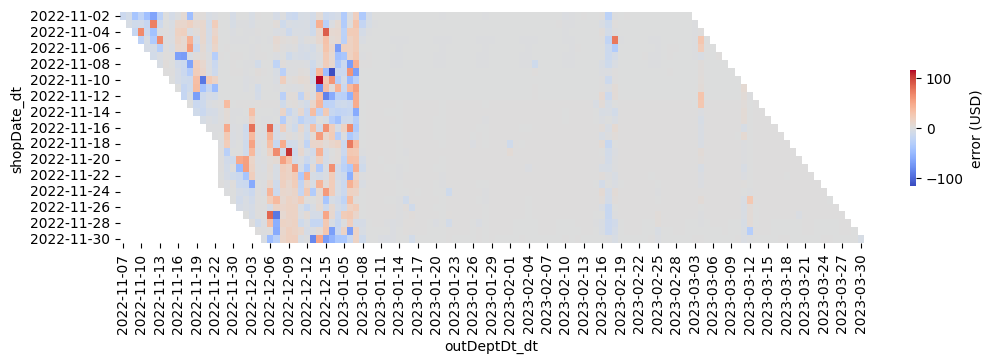

In [41]:
# break
v = 115
pvt_data = market_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="err")
plt.figure(figsize=(12, 3))
sns.heatmap(pvt_data, cmap='coolwarm', 
            cbar_kws={'label': 'error (USD)', 'shrink': 0.5},
            # adjust these based on above min/max
            vmin=-v, vmax=v,
                );

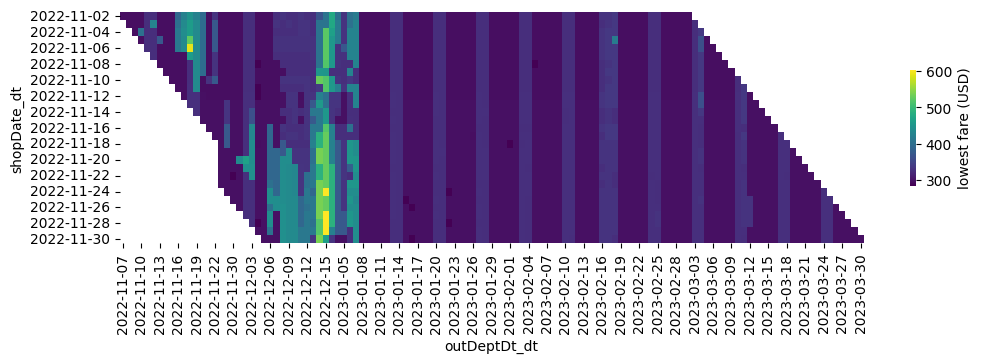

In [42]:
plt.figure(figsize=(12, 3))
pvt_data = market_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="fare")
sns.heatmap(pvt_data, cmap='viridis', #square=True,
                cbar_kws={'label': 'lowest fare (USD)',
                            'shrink': 0.5,
                            }
                );

striations

array([[1.       , 0.3694828],
       [0.3694828, 1.       ]])

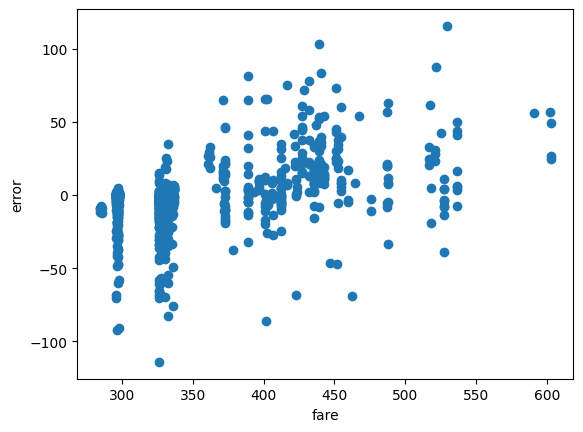

In [43]:
plt.scatter(market_df['fare'], market_df['err']);
plt.xlabel("fare")
plt.ylabel("error");

np.corrcoef(market_df['fare'], market_df['err'])

array([[1.        , 0.78999066],
       [0.78999066, 1.        ]])

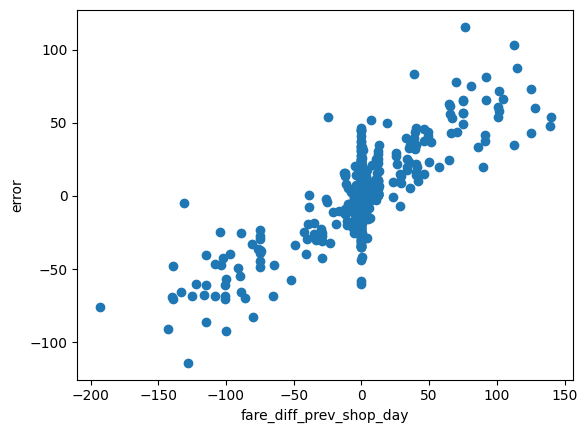

In [44]:
plt.scatter(market_df['fare_diff_prev_shop_day'], market_df['err']);
plt.xlabel("fare_diff_prev_shop_day")
plt.ylabel("error");
np.corrcoef(market_df['fare_diff_prev_shop_day'], market_df['err'])

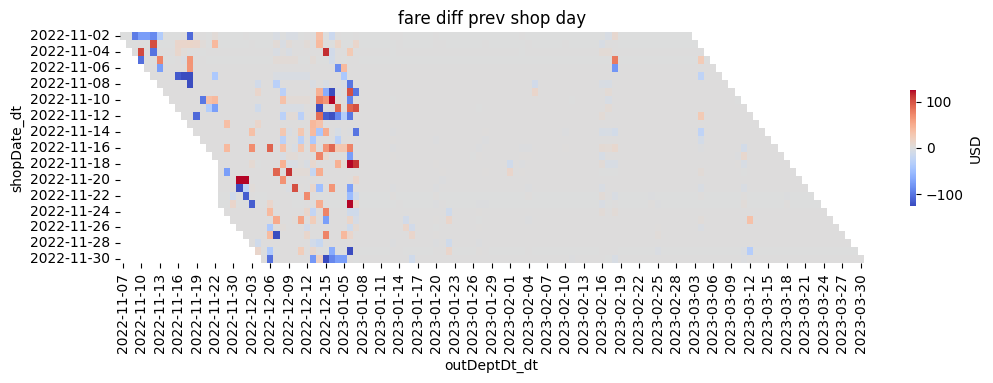

In [45]:
plt.figure(figsize=(12, 3))
v=125
pvt_data = market_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="fare_diff_prev_shop_day")
sns.heatmap(pvt_data, cmap='coolwarm', 
                cbar_kws={'label': 'USD', 'shrink': 0.5,},
            vmin=-v, vmax=v
                );
plt.title("fare diff prev shop day");

## LHR-JFK
top top market

In [189]:
market = 'LHR-JFK'
market_df = df[df['market'] == market]

In [47]:
market_df[['fare', 'abs_err', 'abs_pct_err']].describe()

,fare,abs_err,abs_pct_err
count,2747.000000,2747.000000,2747.000000
mean,437.713163,7.626320,0.015133
std,76.216161,16.547522,0.031146
min,380.580000,0.005980,0.000012
25%,397.580000,0.708007,0.001764
50%,401.280000,1.874503,0.004412
75%,457.580000,6.718424,0.013922
max,830.380000,212.953638,0.474940


In [48]:
7.6 / 437.7

0.017363490975554032

In [49]:
x_bar =  market_df['fare'].mean()
sigma =  market_df['fare'].std()

market_df['zscore_fare'] = (market_df['fare'] - x_bar) / sigma

In [50]:
market_df.sort_values(by='abs_err', ascending=False)[
    ['out_departure_date', 'shop_date', 'days_til_dept', 'fare', 'zscore_fare', 'prediction', 'err',
    'shop_counts', 'shop_counts_prev_shop_day']
].head(10)

,out_departure_date,shop_date,days_til_dept,fare,zscore_fare,prediction,err,shop_counts,shop_counts_prev_shop_day
5577,20230103,20221129,35,448.38,0.139955,661.333638,-212.953638,550,625
30202,20230103,20221117,47,439.18,0.019246,635.593883,-196.413883,426,423
5583,20230104,20221129,36,448.38,0.139955,615.774542,-167.394542,516,502
5525,20221209,20221129,10,542.08,1.369353,704.308174,-162.228174,714,702
30056,20221209,20221120,19,657.88,2.888716,508.089638,149.790362,629,649
31432,20230225,20221118,99,406.68,-0.407173,545.340754,-138.660754,97,108
31437,20230225,20221124,93,572.48,1.768219,443.470760,129.009240,138,81
31395,20230224,20221107,109,559.98,1.604211,433.283811,126.696189,88,62
5539,20221211,20221128,13,597.38,2.094921,472.238823,125.141177,583,756
5576,20230103,20221116,48,791.68,4.644249,669.014464,122.665536,423,532


01/03 is close to a Holiday -- perhaps could have been included in them. And/or, it is being influenced by its proximity to one: the previous day is a holiday, and we didn't clip out holidays before engineering features.

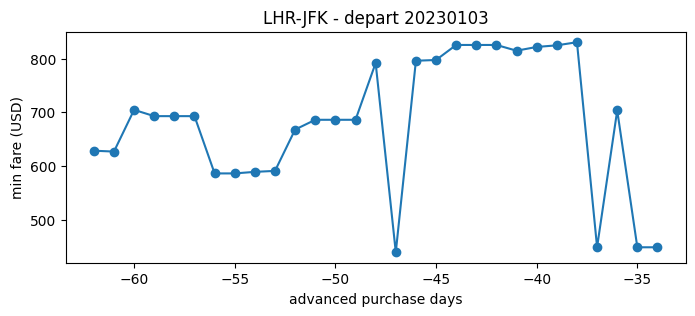

In [51]:
plot_min_fare(market_df, 20230103, market)

In [195]:
market_df[market_df['outDeptDt_dt'] == datetime.date(2023,1,3)][
     ['shop_date', 'days_til_dept', 'fare', 'prediction', 'err', 'abs_pct_err',
    'shop_counts',]
].sort_values(by='shop_date')

,shop_date,days_til_dept,fare,prediction,err,abs_pct_err,shop_counts
30191,20221102,62,628.28,656.979435,-28.699435,0.045679,379
30192,20221103,61,626.68,663.379782,-36.699782,0.058562,423
30193,20221104,60,704.38,673.603028,30.776972,0.043694,492
5573,20221105,59,692.68,680.234801,12.445199,0.017967,386
30194,20221106,58,692.68,641.757252,50.922748,0.073516,435
30195,20221107,57,692.68,679.183190,13.496810,0.019485,500
30196,20221108,56,585.98,650.319742,-64.339742,0.109799,556
5574,20221109,55,585.98,629.186620,-43.206620,0.073734,500
30197,20221110,54,588.88,584.034164,4.845836,0.008229,481
30198,20221111,53,590.68,586.951285,3.728715,0.006313,454


Also see some volatility in fare for this date

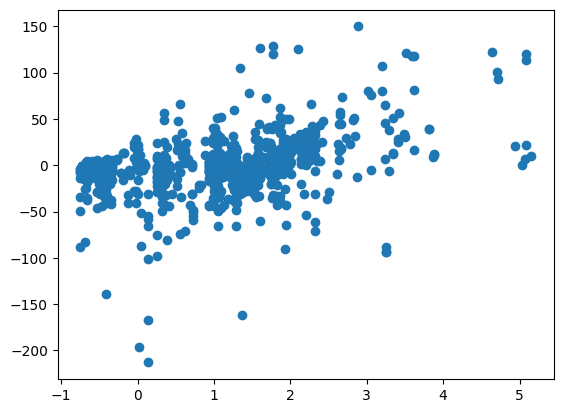

In [52]:
plt.scatter(market_df['zscore_fare'], market_df['err']);

Error by DTD

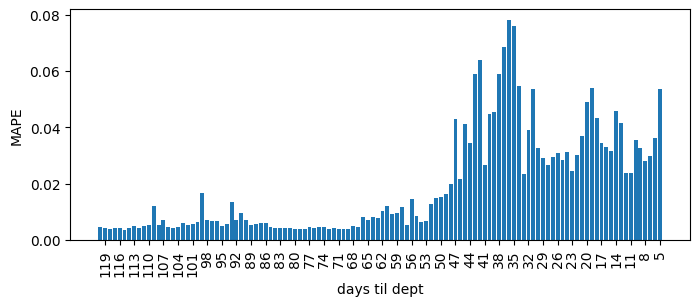

In [53]:
dtd_errs = market_df.groupby("days_til_dept").agg(
    {"abs_err": ['mean', 'std'],
    "abs_pct_err": ['mean', 'std']
    })
     

dtd_errs.columns = ['mean_abs_err', 'std_abs_err', 'mape', 'std_ape']
dtd_errs.reset_index(inplace=True)

data_to_plot = dtd_errs.copy()

plt.figure(figsize=(8,3))
xs = np.arange(len(data_to_plot))
rev_xs = [-x for x in xs]
plt.bar(rev_xs, data_to_plot['mape'],) #yerr=data_df['std_ape_rf'])
every = 3
plt.xticks(rev_xs[::every], data_to_plot['days_til_dept'][::every], rotation=90)
plt.ylabel("MAPE")
plt.xlabel("days til dept");


Very good > 50-60 dtd

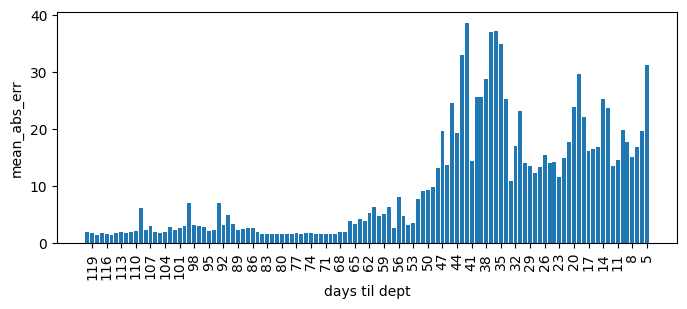

In [54]:
plt.figure(figsize=(8,3))
xs = np.arange(len(data_to_plot))
rev_xs = [-x for x in xs]
plt.bar(rev_xs, data_to_plot['mean_abs_err'],) #yerr=data_df['std_ape_rf'])
every = 3
plt.xticks(rev_xs[::every], data_to_plot['days_til_dept'][::every], rotation=90)
plt.ylabel("mean_abs_err")
plt.xlabel("days til dept");

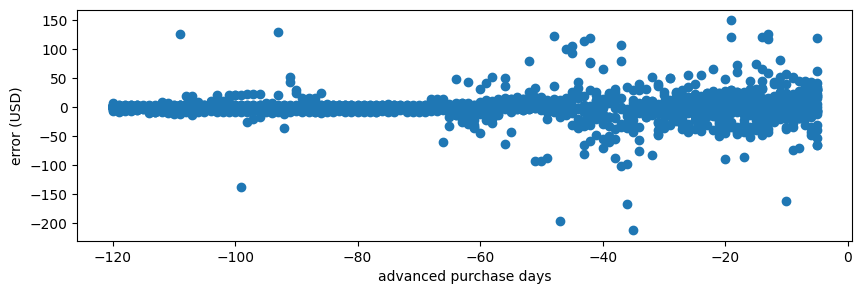

In [55]:
plt.figure(figsize=(10, 3))
plt.scatter(-market_df['days_til_dept'], market_df['err']);
plt.xlabel("advanced purchase days");
plt.ylabel("error (USD)");

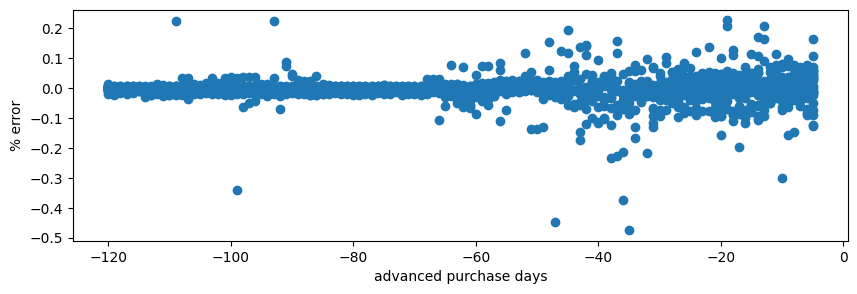

In [56]:
plt.figure(figsize=(10, 3))
plt.scatter(-market_df['days_til_dept'], market_df['pct_err']);
plt.xlabel("advanced purchase days");
plt.ylabel("% error");

Error by dept date

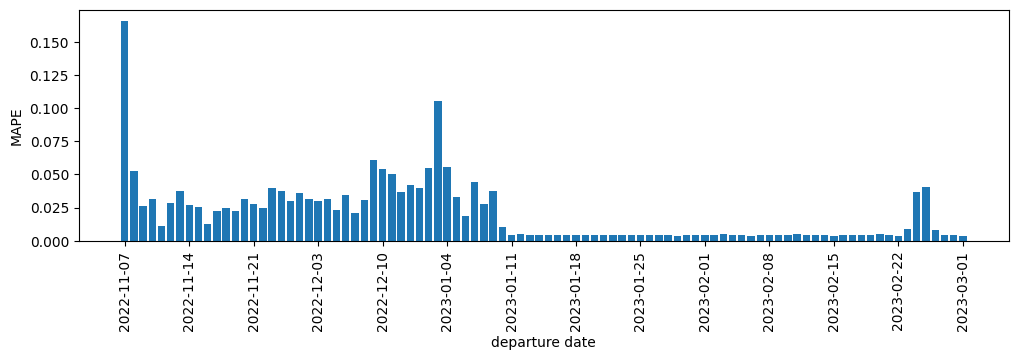

In [57]:
dd_err = market_df.groupby("outDeptDt_dt").agg(
    {"abs_err": ['mean', 'std'],
    "abs_pct_err": ['mean', 'std']
    })
     
dd_err.columns = ['mean_abs_err', 'std_abs_err', 'mape', 'std_ape']
dd_err.reset_index(inplace=True)

# data_to_plot = dd_err[dd_err['out_departure_date'] <= 20230301]
data_to_plot = dd_err[dd_err['outDeptDt_dt'] <= datetime.date(2023,3,1)]


plt.figure(figsize=(12,3))
xs = np.arange(len(data_to_plot))
plt.bar(xs, data_to_plot['mape'],) #yerr=data_df['std_ape_rf'])
every = 7
plt.xticks(xs[::every], data_to_plot['outDeptDt_dt'][::every], rotation=90)
plt.ylabel("MAPE")
plt.xlabel("departure date");

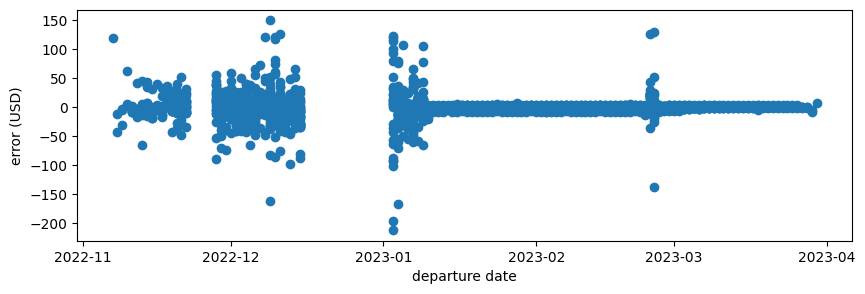

In [58]:
plt.figure(figsize=(10, 3))
plt.scatter(market_df['outDeptDt_dt'], market_df['err']);
plt.xlabel("departure date");
plt.ylabel("error (USD)");

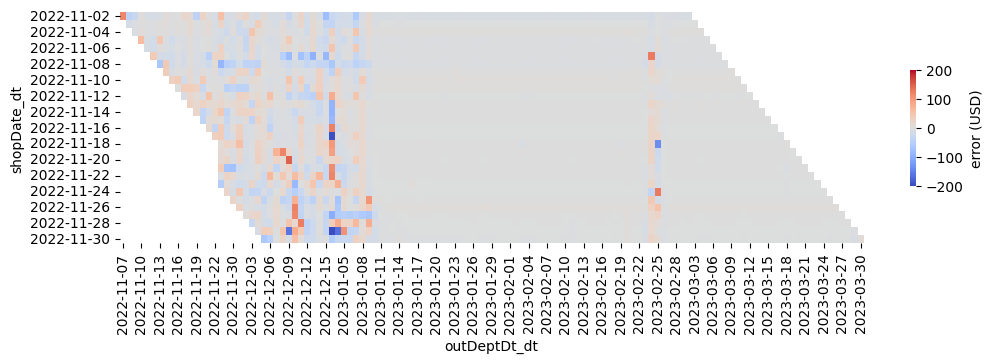

In [59]:
# clip_market_df = market_df[market_df['abs_err'] < 200]
v = 200
pvt_data = market_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="err")
plt.figure(figsize=(12, 3))
sns.heatmap(pvt_data, cmap='coolwarm', #square=True,
            cbar_kws={'label': 'error (USD)', 'shrink': 0.5},
            vmin=-v, vmax=v,
                );

Note: irregularity along left diagonal is due to T-day holiday

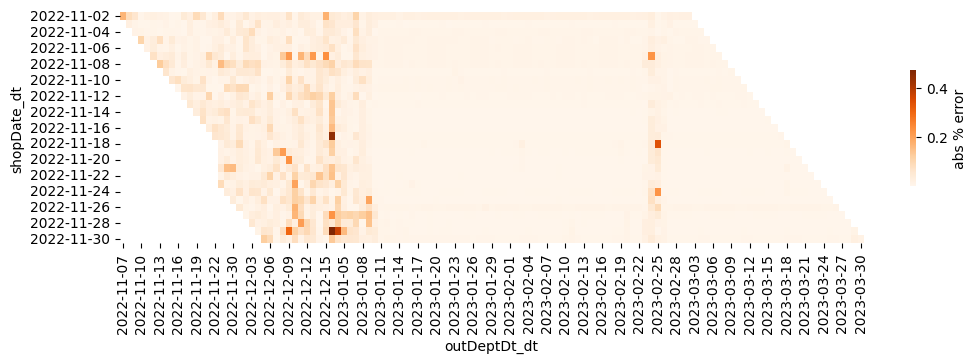

In [60]:
plt.figure(figsize=(12, 3))
pvt_data = market_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="abs_pct_err")
sns.heatmap(pvt_data, cmap='Oranges', #square=True,
            cbar_kws={'label': 'abs % error', 'shrink': 0.5},
                );

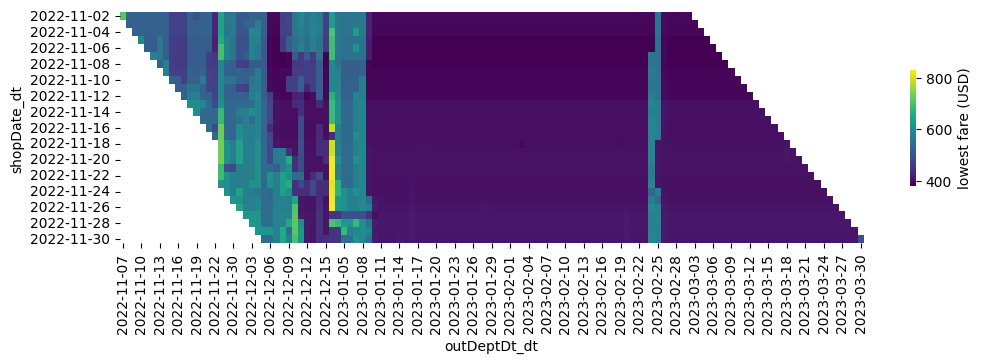

In [61]:
plt.figure(figsize=(12, 3))
pvt_data = market_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="fare")
sns.heatmap(pvt_data, cmap='viridis', #square=True,
                cbar_kws={'label': 'lowest fare (USD)',
                            'shrink': 0.5,
                            }
                );

array([[1.        , 0.77022367],
       [0.77022367, 1.        ]])

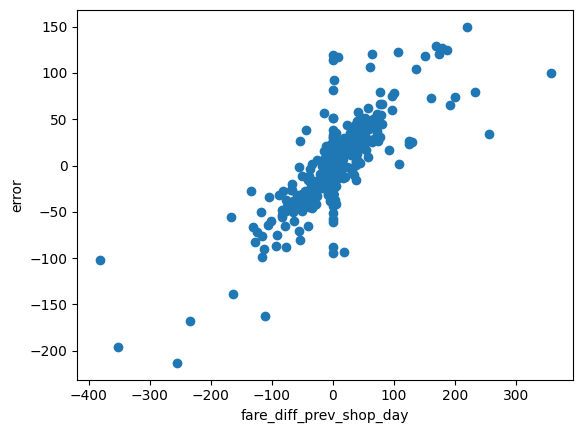

In [62]:
plt.scatter(market_df['fare_diff_prev_shop_day'], market_df['err']);
plt.xlabel("fare_diff_prev_shop_day")
plt.ylabel("error");
np.corrcoef(market_df['fare_diff_prev_shop_day'], market_df['err'])

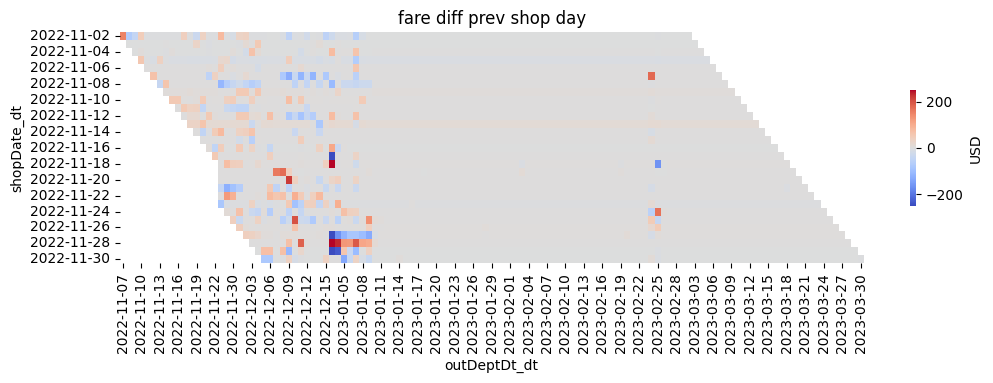

In [63]:
plt.figure(figsize=(12, 3))
v=250
pvt_data = market_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="fare_diff_prev_shop_day")
sns.heatmap(pvt_data, cmap='coolwarm', 
                cbar_kws={'label': 'USD', 'shrink': 0.5,},
            vmin=-250, vmax=250
                );
plt.title("fare diff prev shop day");

## JFK-LAX

In [64]:
market = 'JFK-LAX'
market_df = df[df['market'] == market]

In [65]:
market_df[['fare', 'abs_err', 'abs_pct_err']].describe()

,fare,abs_err,abs_pct_err
count,2747.000000,2747.000000,2747.000000
mean,140.877539,6.511129,0.043020
std,38.294070,9.434634,0.062027
min,89.600000,0.002303,0.000019
25%,108.600000,0.781998,0.005461
50%,128.600000,2.738580,0.019868
75%,159.100000,8.522379,0.055806
max,292.600000,101.099874,1.025354


In [66]:
x_bar =  market_df['fare'].mean()
sigma =  market_df['fare'].std()

market_df['zscore_fare'] = (market_df['fare'] - x_bar) / sigma

In [67]:
market_df.sort_values(by='abs_err', ascending=False)[
    ['out_departure_date', 'shop_date', 'days_til_dept', 'fare', 'zscore_fare', 'prediction', 'err',
    'shop_counts', 'shop_counts_prev_shop_day']
].head(10)

,out_departure_date,shop_date,days_til_dept,fare,zscore_fare,prediction,err,shop_counts,shop_counts_prev_shop_day
1821,20230107,20221117,51,98.60,-1.104023,199.699874,-101.099874,265,241
15798,20230217,20221125,84,108.60,-0.842886,181.540554,-72.940554,65,62
2065,20230217,20221126,83,252.61,2.917748,184.138104,68.471896,57,65
16240,20230310,20221112,118,231.60,2.369099,163.183725,68.416275,29,27
1813,20230105,20221129,37,106.60,-0.895114,171.959024,-65.359024,466,412
2070,20230218,20221113,97,262.60,3.178624,199.100614,63.499386,79,72
15804,20230218,20221106,104,257.60,3.048056,194.436213,63.163787,74,59
2062,20230216,20221124,84,108.60,-0.842886,168.997161,-60.397161,108,92
15781,20230217,20221106,103,292.60,3.962035,232.896090,59.703910,33,48
15764,20230216,20221114,94,108.60,-0.842886,167.008033,-58.408033,137,78


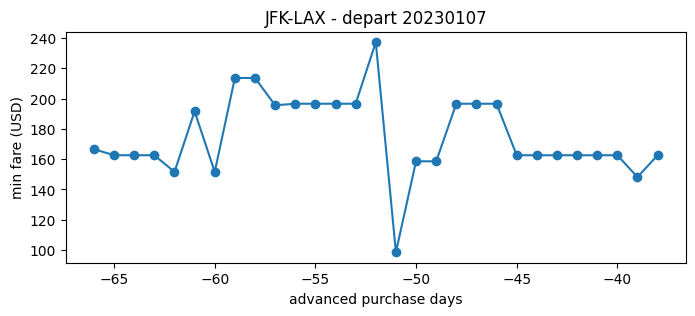

In [68]:
plot_min_fare(market_df, 20230107, market)

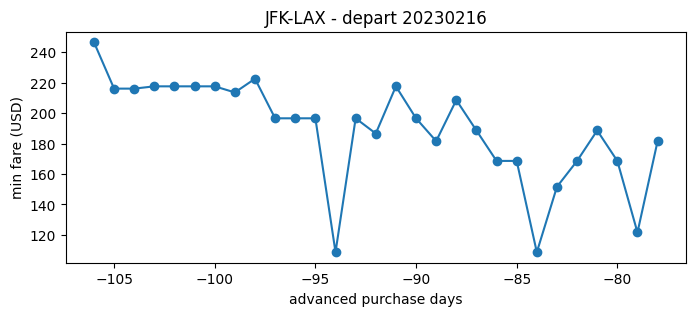

In [69]:
plot_min_fare(market_df, 20230216, market)

In [70]:
market_df[market_df['out_departure_date'] == 20230216].sort_values(by='shop_date')[
    ['days_til_dept', 'fare', 'out_cxrs', 'prediction', 'err', 'shop_counts', 'avg_fare_dtd']
]

,days_til_dept,fare,out_cxrs,prediction,err,shop_counts,avg_fare_dtd
15757,106,246.60,[B6],216.692049,29.907951,44,136.266667
15758,105,216.11,[AA],211.440914,4.669086,42,129.350000
2054,104,216.11,[AA],193.939763,22.170237,29,128.600000
15759,103,217.61,[AA],196.236058,21.373942,82,122.433333
2055,102,217.61,[AA],214.546286,3.063714,38,128.600000
2056,101,217.61,[AA],209.643551,7.966449,42,118.600000
15760,100,217.61,[AA],210.687048,6.922952,68,115.266667
15761,99,213.60,[DL],206.961915,6.638085,53,116.900000
2057,98,222.60,[AA],192.435277,30.164723,33,116.145455
15762,97,196.60,[DL],206.528769,-9.928769,70,115.516667


$108 seems a little low for JFK-LAX...

In [71]:
dtd_errs = market_df.groupby("days_til_dept").agg(
    {"abs_err": ['mean', 'std'],
    "abs_pct_err": ['mean', 'std']
    })
dtd_errs.columns = ['mean_abs_err', 'std_abs_err', 'mape', 'std_ape']
dtd_errs.reset_index(inplace=True)

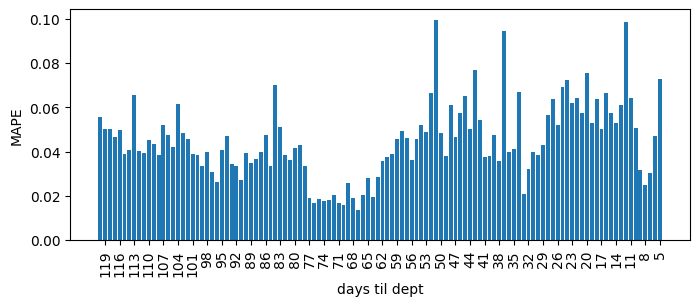

In [72]:
data_to_plot = dtd_errs.copy()

plt.figure(figsize=(8,3))
xs = np.arange(len(data_to_plot))
rev_xs = [-x for x in xs]
plt.bar(rev_xs, data_to_plot['mape'],) #yerr=data_df['std_ape_rf'])
every = 3
plt.xticks(rev_xs[::every], data_to_plot['days_til_dept'][::every], rotation=90)
plt.ylabel("MAPE")
plt.xlabel("days til dept");

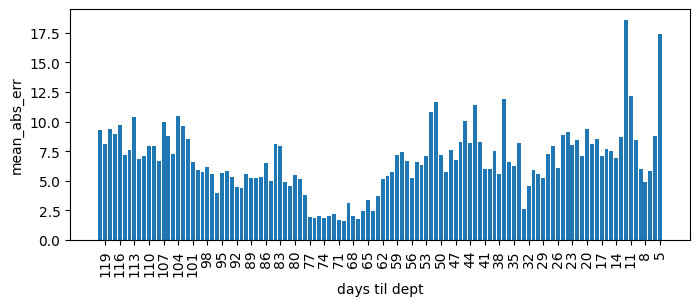

In [73]:
plt.figure(figsize=(8,3))
xs = np.arange(len(data_to_plot))
rev_xs = [-x for x in xs]
plt.bar(rev_xs, data_to_plot['mean_abs_err'],) #yerr=data_df['std_ape_rf'])
every = 3
plt.xticks(rev_xs[::every], data_to_plot['days_til_dept'][::every], rotation=90)
plt.ylabel("mean_abs_err")
plt.xlabel("days til dept");

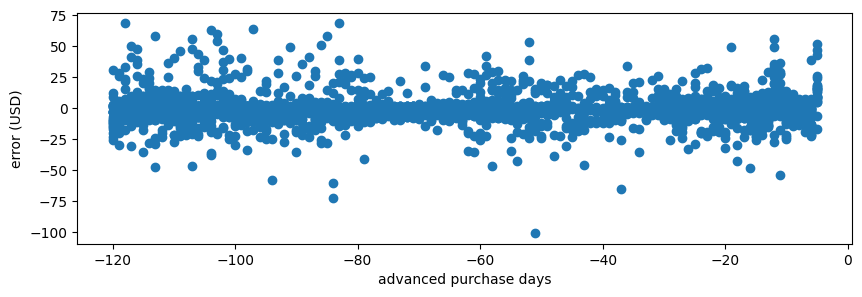

In [74]:
plt.figure(figsize=(10, 3))
plt.scatter(-market_df['days_til_dept'], market_df['err']);
plt.xlabel("advanced purchase days");
plt.ylabel("error (USD)");

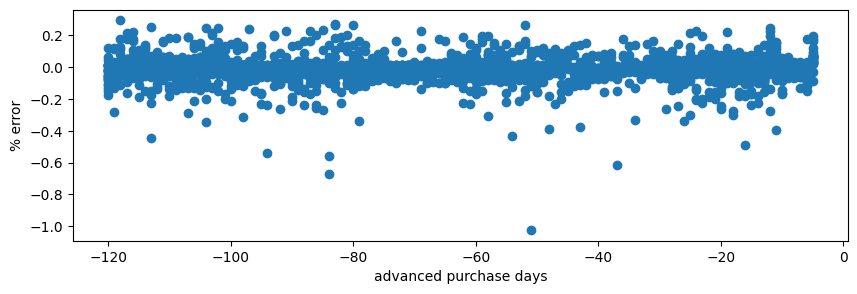

In [75]:
plt.figure(figsize=(10, 3))
plt.scatter(-market_df['days_til_dept'], market_df['pct_err']);
plt.xlabel("advanced purchase days");
plt.ylabel("% error");

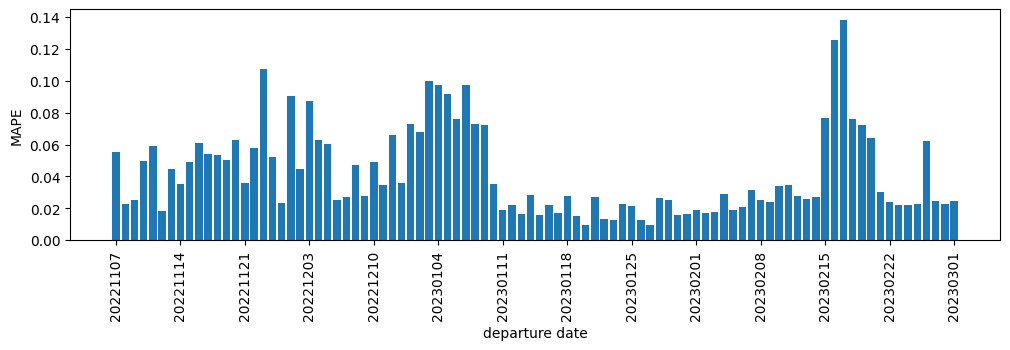

In [76]:
dd_err = market_df.groupby("out_departure_date").agg(
    {"abs_err": ['mean', 'std'],
    "abs_pct_err": ['mean', 'std']
    })
     
dd_err.columns = ['mean_abs_err', 'std_abs_err', 'mape', 'std_ape']
dd_err.reset_index(inplace=True)

data_to_plot = dd_err[dd_err['out_departure_date'] <= 20230301]

plt.figure(figsize=(12,3))
xs = np.arange(len(data_to_plot))
plt.bar(xs, data_to_plot['mape'],) #yerr=data_df['std_ape_rf'])
every = 7
plt.xticks(xs[::every], data_to_plot['out_departure_date'][::every], rotation=90)
plt.ylabel("MAPE")
plt.xlabel("departure date");


In [77]:
max(market_df['err']), min(market_df['err'])

(68.47189638539612, -101.09987364129339)

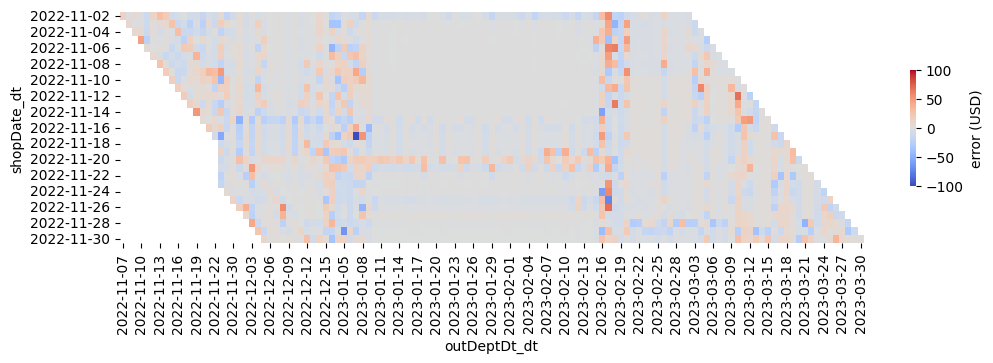

In [78]:
v = 100
pvt_data = market_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="err")
plt.figure(figsize=(12, 3))
sns.heatmap(pvt_data, cmap='coolwarm', #square=True,
            cbar_kws={'label': 'error (USD)', 'shrink': 0.5},
            vmin=-v, vmax=v,
                );

In [79]:
# clip_market_df = market_df[market_df['abs_err'] < 200]
# pvt_data = clip_market_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="err")
# plt.figure(figsize=(12, 3))
# sns.heatmap(pvt_data, cmap='coolwarm', #square=True,
#             cbar_kws={'label': 'error (USD)', 'shrink': 0.5},
#             vmin=-125, vmax=125,
#                 );

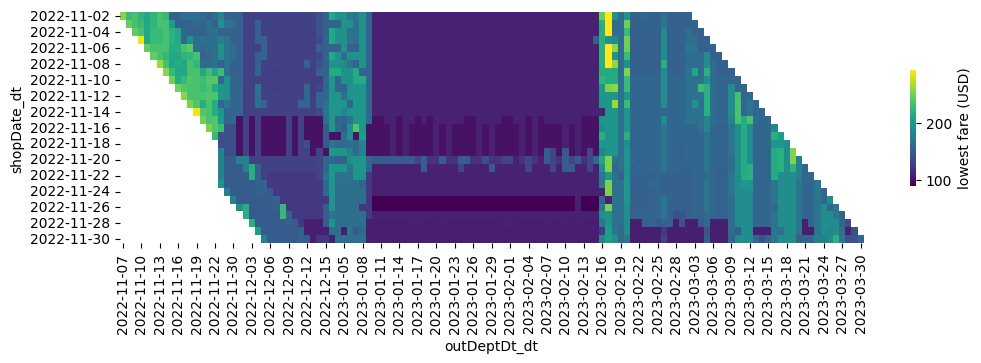

In [80]:
plt.figure(figsize=(12, 3))
pvt_data = market_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="fare")
sns.heatmap(pvt_data, cmap='viridis', #square=True,
                cbar_kws={'label': 'lowest fare (USD)',
                            'shrink': 0.5,
                            }
                );

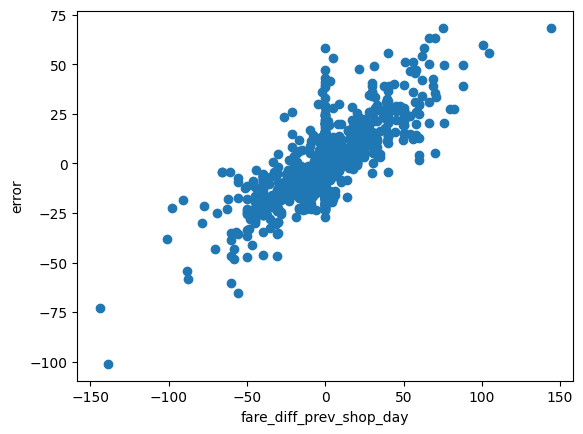

In [81]:
plt.scatter(market_df['fare_diff_prev_shop_day'], market_df['err']);
plt.xlabel("fare_diff_prev_shop_day")
plt.ylabel("error");

In [82]:
np.corrcoef(market_df['fare_diff_prev_shop_day'], market_df['err'])

array([[1.        , 0.74351424],
       [0.74351424, 1.        ]])

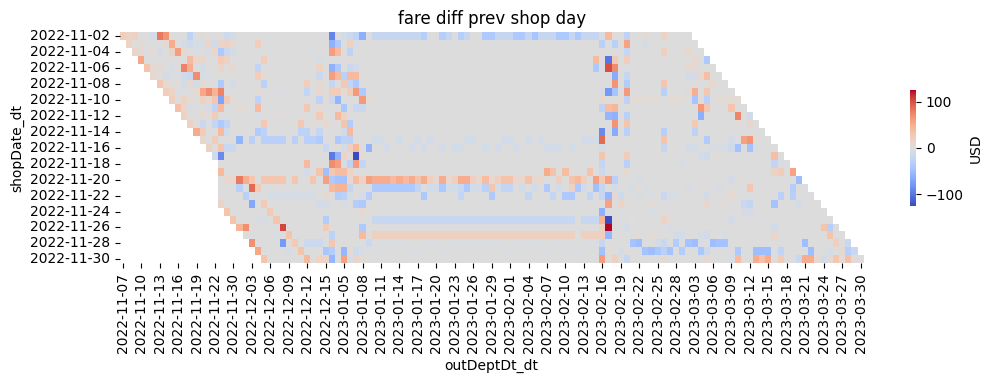

In [83]:
plt.figure(figsize=(12, 3))
v=125
pvt_data = market_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="fare_diff_prev_shop_day")
sns.heatmap(pvt_data, cmap='coolwarm', 
                cbar_kws={'label': 'USD', 'shrink': 0.5,},
            vmin=-v, vmax=v
                );
plt.title("fare diff prev shop day");

See horizontal bands at shop day 11/20 & 11/21 -- meaning fare went up, then down, across a range of departure dates. Again on 11/25 (fares went down), and 11/27 (fares went back up). Did a carrier have a one- or few-day sale? Black Friday was 11/25

## JFK-LHR

In [84]:
market = 'JFK-LHR'
market_df = df[df['market'] == market]

In [85]:
market_df[['fare', 'abs_err', 'abs_pct_err']].describe()

,fare,abs_err,abs_pct_err
count,2747.000000,2747.000000,2747.000000
mean,314.787040,8.469899,0.025875
std,50.210076,18.609780,0.059869
min,150.800000,0.000421,0.000001
25%,296.700000,0.275711,0.000911
50%,297.500000,0.600969,0.001923
75%,327.400000,6.295275,0.024437
max,702.600000,196.456140,0.913886


In [86]:
x_bar =  market_df['fare'].mean()
sigma =  market_df['fare'].std()

market_df['zscore_fare'] = (market_df['fare'] - x_bar) / sigma

In [87]:
market_df.sort_values(by='abs_err', ascending=False)[
    ['out_departure_date', 'shop_date', 'days_til_dept', 'fare', 'zscore_fare', 'prediction', 'err',
    'shop_counts', 'shop_counts_prev_shop_day']
].head(10)

,out_departure_date,shop_date,days_til_dept,fare,zscore_fare,prediction,err,shop_counts,shop_counts_prev_shop_day
2349,20221215,20221109,36,554.3,4.770217,357.843860,196.456140,1004,1012
16925,20221215,20221128,17,702.6,7.723807,515.258869,187.341131,2282,1161
2345,20221214,20221122,22,529.2,4.270317,353.448686,175.751314,769,806
16915,20221215,20221115,30,564.6,4.975355,391.404408,173.195592,2062,1563
2356,20230103,20221124,40,297.2,-0.350269,449.474132,-152.274132,787,836
17733,20230206,20221124,74,150.8,-3.266019,288.613955,-137.813955,397,291
2551,20230206,20221105,93,296.0,-0.374169,159.317801,136.682199,142,225
17873,20230213,20221102,103,150.8,-3.266019,283.219425,-132.419425,172,172
2598,20230213,20221105,100,296.0,-0.374169,170.724669,125.275331,158,120
17564,20230130,20221109,82,296.4,-0.366202,174.018944,122.381056,198,254


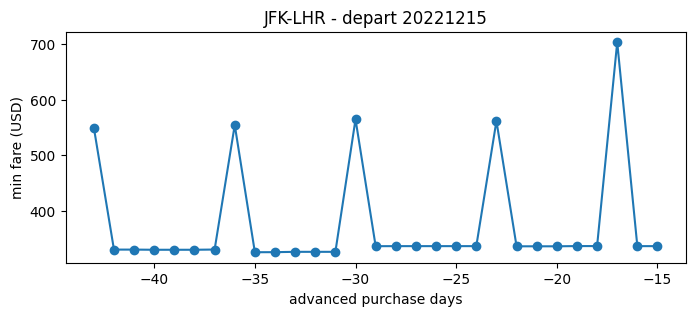

In [88]:
plot_min_fare(market_df, 20221215, market)

Isn't that fun?

In [89]:
market_df[market_df['out_departure_date'] == 20221215].sort_values(by='shop_date')[
    ['days_til_dept', 'shop_date', 'fare', 'out_cxrs', 'prediction', 'err', 'shop_counts', 'avg_fare_dtd']
]

,days_til_dept,shop_date,fare,out_cxrs,prediction,err,shop_counts,avg_fare_dtd
16905,43,20221102,549.8,"[DL, VS]",430.597863,119.202137,743,393.600000
16906,42,20221103,331.3,[TP],394.180002,-62.880002,857,383.800000
16907,41,20221104,331.3,[TP],378.481878,-47.181878,698,377.900000
16908,40,20221105,331.0,[TP],361.448628,-30.448628,671,369.333333
2348,39,20221106,331.0,[TP],379.370013,-48.370013,686,370.500000
16909,38,20221107,331.0,[TP],371.262980,-40.262980,802,347.325000
16910,37,20221108,331.4,[TP],361.840201,-30.440201,1012,366.833333
2349,36,20221109,554.3,"[DL, VS]",357.843860,196.456140,1004,343.070000
16911,35,20221110,326.6,[TP],364.557864,-37.957864,1019,343.627273
16912,34,20221111,326.7,[TP],352.538573,-25.838573,730,331.391667


TP = Air Portugal; EI = Aer Lingus

Errs by DTD

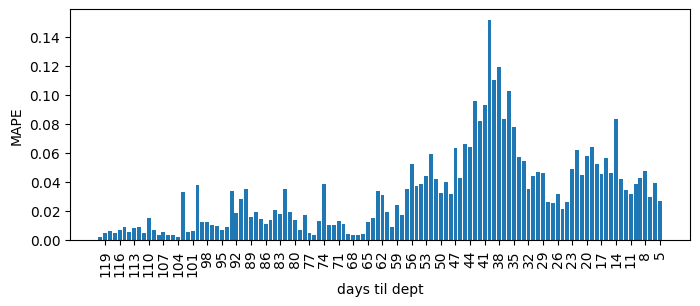

In [90]:
dtd_errs = market_df.groupby("days_til_dept").agg(
    {"abs_err": ['mean', 'std'],
    "abs_pct_err": ['mean', 'std']
    })
dtd_errs.columns = ['mean_abs_err', 'std_abs_err', 'mape', 'std_ape']
dtd_errs.reset_index(inplace=True)

data_to_plot = dtd_errs.copy()

plt.figure(figsize=(8,3))
xs = np.arange(len(data_to_plot))
rev_xs = [-x for x in xs]
plt.bar(rev_xs, data_to_plot['mape'],) #yerr=data_df['std_ape_rf'])
every = 3
plt.xticks(rev_xs[::every], data_to_plot['days_til_dept'][::every], rotation=90)
plt.ylabel("MAPE")
plt.xlabel("days til dept");

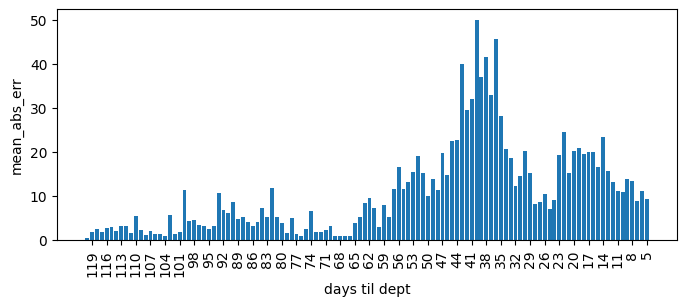

In [91]:
# break
plt.figure(figsize=(8,3))
xs = np.arange(len(data_to_plot))
rev_xs = [-x for x in xs]
plt.bar(rev_xs, data_to_plot['mean_abs_err'],) #yerr=data_df['std_ape_rf'])
every = 3
plt.xticks(rev_xs[::every], data_to_plot['days_til_dept'][::every], rotation=90)
plt.ylabel("mean_abs_err")
plt.xlabel("days til dept");

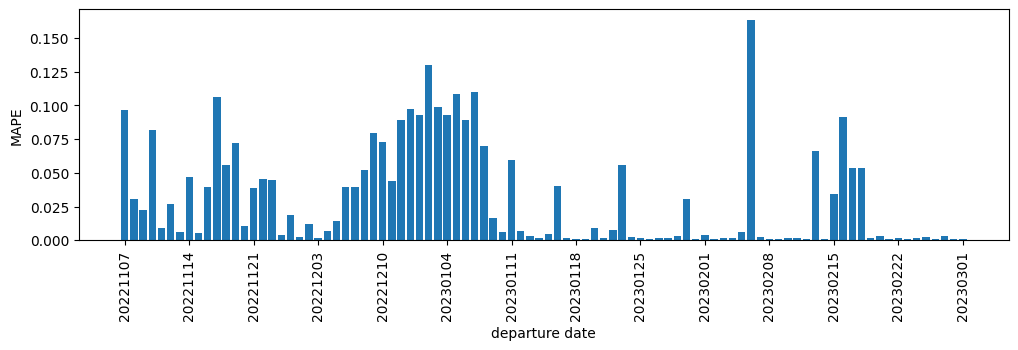

In [92]:
# ERROR BY DEPT DATE
dd_err = market_df.groupby("out_departure_date").agg(
    {"abs_err": ['mean', 'std'],
    "abs_pct_err": ['mean', 'std']
    })
     
dd_err.columns = ['mean_abs_err', 'std_abs_err', 'mape', 'std_ape']
dd_err.reset_index(inplace=True)

data_to_plot = dd_err[dd_err['out_departure_date'] <= 20230301]

plt.figure(figsize=(12,3))
xs = np.arange(len(data_to_plot))
plt.bar(xs, data_to_plot['mape'],) #yerr=data_df['std_ape_rf'])
every = 7
plt.xticks(xs[::every], data_to_plot['out_departure_date'][::every], rotation=90)
plt.ylabel("MAPE")
plt.xlabel("departure date");

In [93]:
data_col = "fare"

In [94]:
market_df['dept_dt_dow_int']

2233     2
2234     3
2235     4
2236     5
2237     5
        ..
18632    1
18633    1
18634    2
18635    2
18636    3
Name: dept_dt_dow_int, Length: 2747, dtype: int32

In [95]:
dow_summ = market_df.groupby(["dept_dt_dow_int"])[data_col].mean()
dow_summ = pd.DataFrame(dow_summ)
dow_summ.reset_index(inplace=True)

In [96]:
dow_list =  ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
dow_dict = dict(zip(range(7), dow_list))

In [97]:
dow_summ['dept_dow'] = dow_summ['dept_dt_dow_int'].map(dow_dict)

In [98]:
dow_summ

,dept_dt_dow_int,fare,dept_dow
0,0,267.252538,Mon
1,1,310.571395,Tue
2,2,313.035222,Wed
3,3,318.682469,Thu
4,4,344.192781,Fri
5,5,347.161126,Sat
6,6,305.572312,Sun


In [99]:
def generic_bar_chart(df, data_col, label_col=None, rotate_labels=False, title=None):
    xs = range(len(df))
    plt.bar(xs, df[data_col])
    if label_col:
        plt.xticks(xs, df[label_col])
        plt.xlabel(label_col)
    if rotate_labels:
        plt.xticks(rotation=90)
    plt.ylabel(data_col)
    plt.title(title)

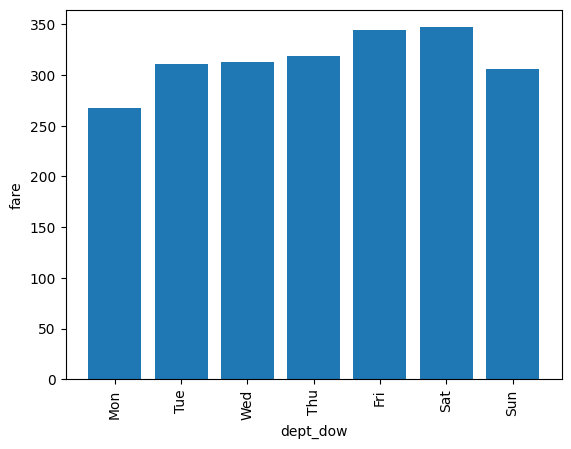

In [100]:
generic_bar_chart(dow_summ, "fare", "dept_dow", True)

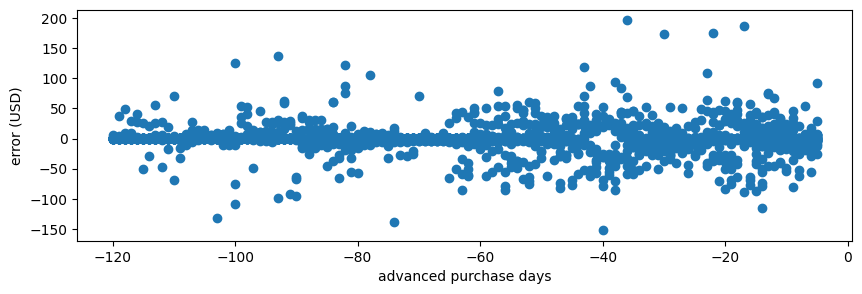

In [101]:
# scatter
plt.figure(figsize=(10, 3))
plt.scatter(-market_df['days_til_dept'], market_df['err']);
plt.xlabel("advanced purchase days");
plt.ylabel("error (USD)");

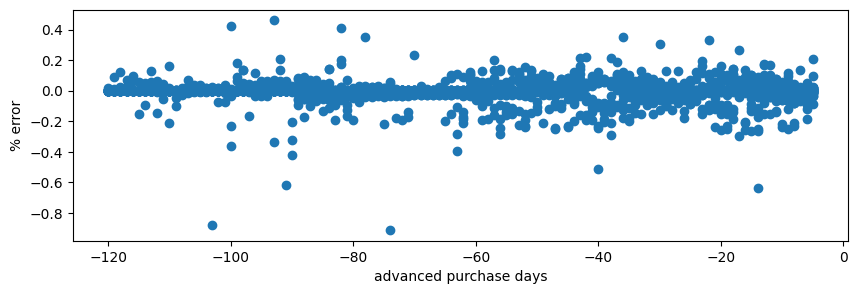

In [102]:
plt.figure(figsize=(10, 3))
plt.scatter(-market_df['days_til_dept'], market_df['pct_err']);
plt.xlabel("advanced purchase days");
plt.ylabel("% error");

In [103]:
max(market_df['err']), min(market_df['err'])

(196.45613955631615, -152.274131590806)

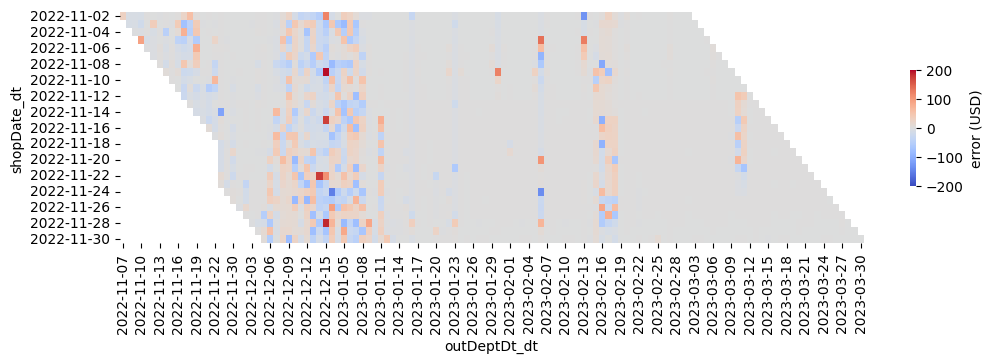

In [104]:
# clip_market_df = market_df[market_df['abs_err'] < 300]
v = 200
pvt_data = market_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="err")
plt.figure(figsize=(12, 3))
sns.heatmap(pvt_data, cmap='coolwarm', 
            cbar_kws={'label': 'error (USD)', 'shrink': 0.5},
            # adjust these based on above min/max
            vmin=-v, vmax=v,
                );

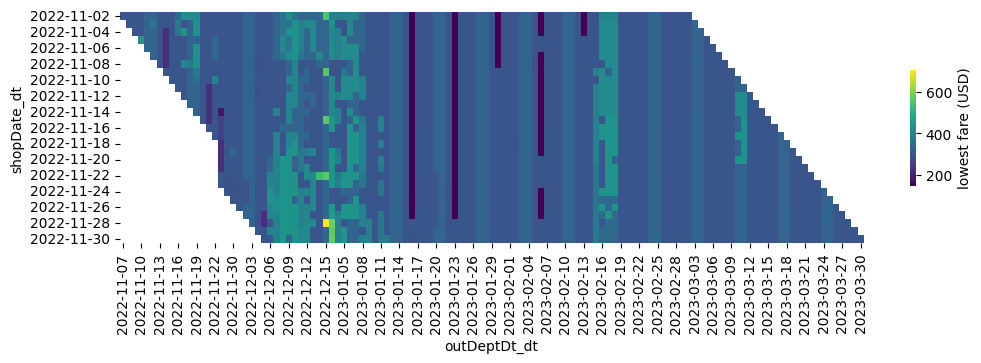

In [105]:
plt.figure(figsize=(12, 3))
pvt_data = market_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="fare")
sns.heatmap(pvt_data, cmap='viridis', #square=True,
                cbar_kws={'label': 'lowest fare (USD)',
                            'shrink': 0.5,
                            }
                );

Striations!

array([[1.       , 0.8123482],
       [0.8123482, 1.       ]])

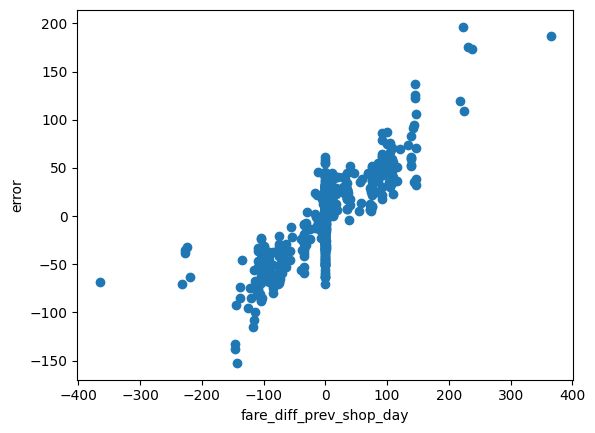

In [106]:
plt.scatter(market_df['fare_diff_prev_shop_day'], market_df['err']);
plt.xlabel("fare_diff_prev_shop_day")
plt.ylabel("error");
np.corrcoef(market_df['fare_diff_prev_shop_day'], market_df['err'])

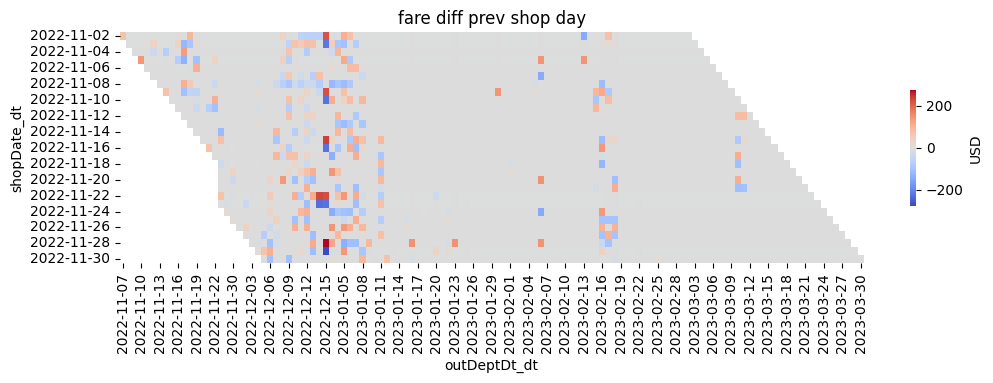

In [107]:
plt.figure(figsize=(12, 3))
v=275
pvt_data = market_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="fare_diff_prev_shop_day")
sns.heatmap(pvt_data, cmap='coolwarm', 
                cbar_kws={'label': 'USD', 'shrink': 0.5,},
            vmin=-v, vmax=v
                );
plt.title("fare diff prev shop day");

## OAK-LAS

In [196]:
market = 'OAK-LAS'
market_df = df[df['market'] == market]

In [109]:
market_df[['fare', 'abs_err', 'abs_pct_err']].describe()

,fare,abs_err,abs_pct_err
count,2743.000000,2743.000000,2743.000000
mean,35.514145,5.063167,0.111196
std,24.030444,13.159778,0.176288
min,23.970000,0.004803,0.000102
25%,23.970000,0.443940,0.015523
50%,24.970000,1.472245,0.047088
75%,36.590000,4.351403,0.129649
max,312.200000,171.536046,1.888922


In [110]:
x_bar =  market_df['fare'].mean()
sigma =  market_df['fare'].std()

market_df['zscore_fare'] = (market_df['fare'] - x_bar) / sigma

In [111]:
market_df.sort_values(by='abs_err', ascending=False)[
    ['out_departure_date', 'shop_date', 'days_til_dept', 'fare', 'zscore_fare', 'prediction', 'err',
    'shop_counts', 'out_cxrs']
].head(10)

,out_departure_date,shop_date,days_til_dept,fare,zscore_fare,prediction,err,shop_counts,out_cxrs
6980,20230224,20221119,97,231.60,8.159893,60.063954,171.536046,14,[AS]
36198,20230317,20221126,111,293.60,10.739954,123.651519,169.948481,7,[DL]
6948,20230220,20221103,109,211.60,7.327616,47.143492,164.456508,12,[AS]
35657,20230217,20221126,83,312.20,11.513972,158.605042,153.594958,10,[DL]
7011,20230302,20221104,118,209.60,7.244388,58.438416,151.161584,3,[DL]
7024,20230305,20221113,112,192.60,6.536952,42.644352,149.955648,3,[DL]
35936,20230302,20221114,108,228.59,8.034636,81.539589,147.050411,12,[DL]
36200,20230317,20221128,109,293.60,10.739954,157.799127,135.800873,10,[DL]
35962,20230303,20221113,110,228.59,8.034636,95.656212,132.933788,10,[DL]
7060,20230312,20221123,109,211.60,7.327616,89.306060,122.293940,6,[AS]


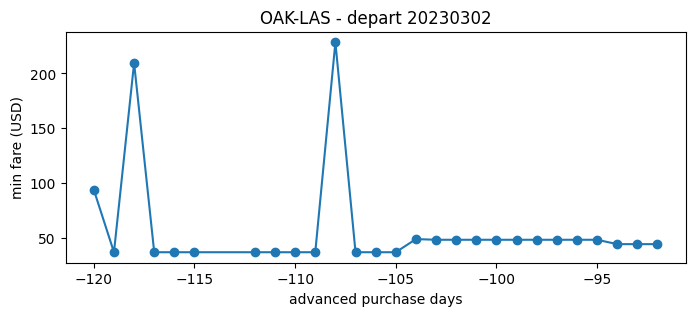

In [112]:
plot_min_fare(market_df, 20230302, market)

In [197]:
market_df.sort_values(by='shop_date', inplace=True)
market_df[market_df['out_departure_date'] == 20230302][
    ['days_til_dept', 'fare', 'out_cxrs', 'prediction', 'err', 'shop_counts']
].head(15)

,days_til_dept,fare,out_cxrs,prediction,err,shop_counts
35929,120,93.59,[NK],90.320237,3.269763,11
7010,119,36.59,[NK],83.160639,-46.570639,12
7011,118,209.60,[DL],58.438416,151.161584,3
35930,117,36.59,[NK],52.391901,-15.801901,6
7012,116,36.59,[NK],46.559253,-9.969253,6
35931,115,36.59,[NK],43.878033,-7.288033,4
35932,112,36.59,[NK],51.683595,-15.093595,13
35933,111,36.59,[NK],47.995999,-11.405999,2
35934,110,36.59,[NK],52.036389,-15.446389,3
35935,109,36.59,[NK],61.402585,-24.812585,15


In [114]:
carrier_dict = {
    'F9': 'Frontier',
    'NK': 'Spirit',
    'DL': 'Delta',
    'AS': 'Alaska Airlines',
    'HA': 'Hawaiian Airlines'
}

In [115]:
mdf_by_cxr = market_df.groupby(['out_first_cxr']).agg(
    {"fare": ["mean"],
#      "abs_err": ["mean"]
    }
)
mdf_by_cxr.columns = ['avg_fare'] #, 'avg_abs_err']
mdf_by_cxr.reset_index(inplace=True)
mdf_by_cxr.rename(columns={'out_first_cxr':'carrier'}, inplace=True)
mdf_by_cxr.sort_values(by='avg_fare', inplace=True)
mdf_by_cxr.reset_index(inplace=True, drop=True)

In [116]:
mdf_by_cxr['carrier_name'] = mdf_by_cxr['carrier'].map(carrier_dict)
mdf_by_cxr = mdf_by_cxr[['carrier', 'carrier_name', 'avg_fare']]
mdf_by_cxr

,carrier,carrier_name,avg_fare
0,F9,Frontier,30.935363
1,NK,Spirit,38.860833
2,DL,Delta,118.604444
3,AS,Alaska Airlines,211.602222


Is that $400 fare real?

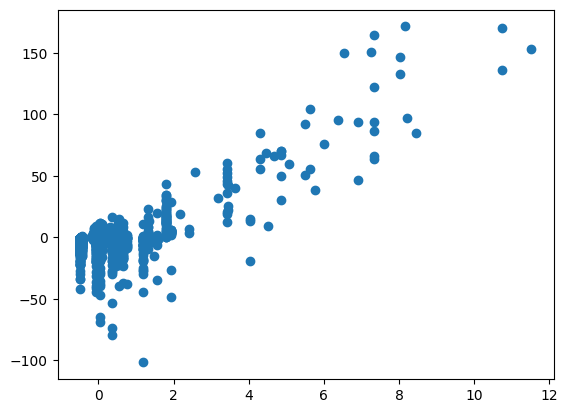

In [117]:
plt.scatter(market_df['zscore_fare'], market_df['err']);

Crazy-high z-scores

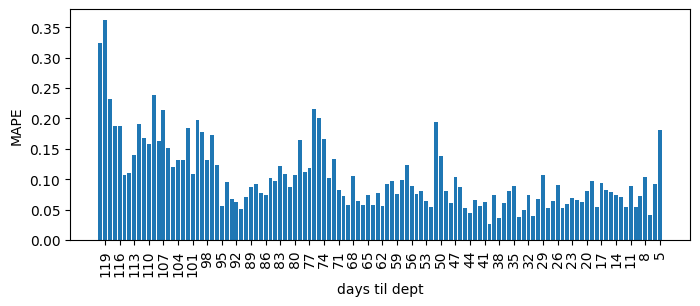

In [118]:
# error by DTD
# =================
dtd_errs = market_df.groupby("days_til_dept").agg(
    {"abs_err": ['mean', 'std'],
    "abs_pct_err": ['mean', 'std']
    })
dtd_errs.columns = ['mean_abs_err', 'std_abs_err', 'mape', 'std_ape']
dtd_errs.reset_index(inplace=True)

data_to_plot = dtd_errs.copy()

plt.figure(figsize=(8,3))
xs = np.arange(len(data_to_plot))
rev_xs = [-x for x in xs]
plt.bar(rev_xs, data_to_plot['mape'],) #yerr=data_df['std_ape_rf'])
every = 3
plt.xticks(rev_xs[::every], data_to_plot['days_til_dept'][::every], rotation=90)
plt.ylabel("MAPE")
plt.xlabel("days til dept");

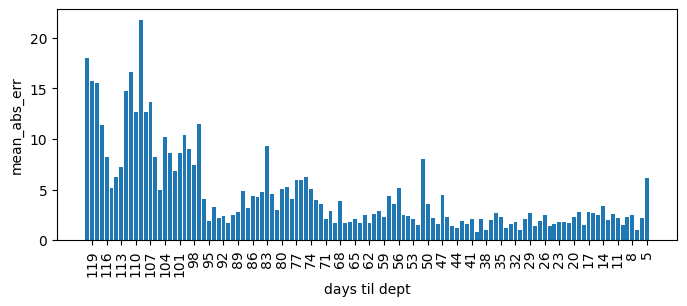

In [119]:
# break
plt.figure(figsize=(8,3))
xs = np.arange(len(data_to_plot))
rev_xs = [-x for x in xs]
plt.bar(rev_xs, data_to_plot['mean_abs_err'],) #yerr=data_df['std_ape_rf'])
every = 3
plt.xticks(rev_xs[::every], data_to_plot['days_til_dept'][::every], rotation=90)
plt.ylabel("mean_abs_err")
plt.xlabel("days til dept");

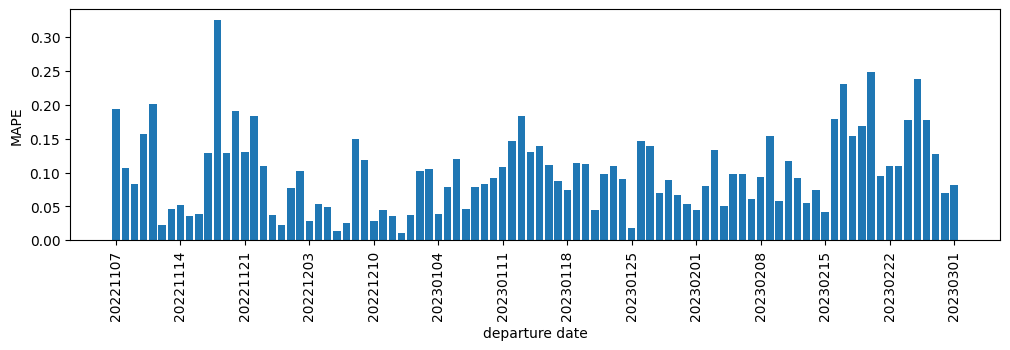

In [120]:
# ERROR BY DEPT DATE
dd_err = market_df.groupby("out_departure_date").agg(
    {"abs_err": ['mean', 'std'],
    "abs_pct_err": ['mean', 'std']
    })
     
dd_err.columns = ['mean_abs_err', 'std_abs_err', 'mape', 'std_ape']
dd_err.reset_index(inplace=True)

data_to_plot = dd_err[dd_err['out_departure_date'] <= 20230301]

plt.figure(figsize=(12,3))
xs = np.arange(len(data_to_plot))
plt.bar(xs, data_to_plot['mape'],) #yerr=data_df['std_ape_rf'])
every = 7
plt.xticks(xs[::every], data_to_plot['out_departure_date'][::every], rotation=90)
plt.ylabel("MAPE")
plt.xlabel("departure date");

In [121]:
# ERROR HEATMAP
max(market_df['err']), min(market_df['err'])

(171.5360461885312, -101.78262084754576)

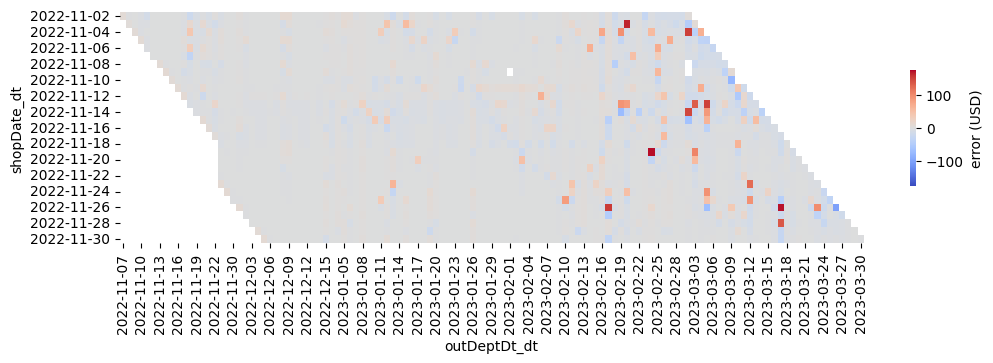

In [122]:
# break
v=175
pvt_data = market_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="err")
plt.figure(figsize=(12, 3))
sns.heatmap(pvt_data, cmap='coolwarm', 
            cbar_kws={'label': 'error (USD)', 'shrink': 0.5},
            # adjust these based on above min/max
            vmin=-v, vmax=v,
                );

sporadic errors out in Feb / Mar. Less so in sooner departures

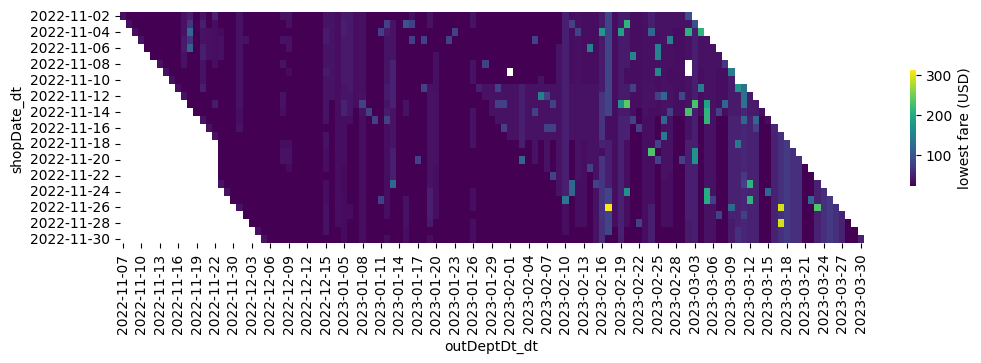

In [123]:
plt.figure(figsize=(12, 3))
pvt_data = market_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="fare")
sns.heatmap(pvt_data, cmap='viridis', #square=True,
                cbar_kws={'label': 'lowest fare (USD)',
                            'shrink': 0.5,
                            }
                );

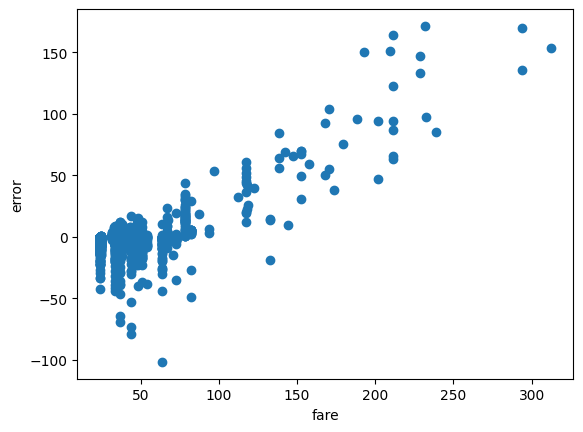

In [124]:
plt.scatter(market_df['fare'], market_df['err']);
plt.xlabel("fare")
plt.ylabel("error");

In [125]:
np.corrcoef(market_df['fare'], market_df['err'])

array([[1.        , 0.71624766],
       [0.71624766, 1.        ]])

array([[1.        , 0.76991129],
       [0.76991129, 1.        ]])

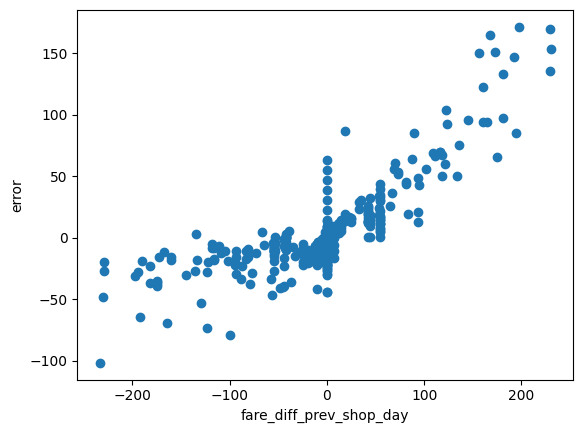

In [126]:
plt.scatter(market_df['fare_diff_prev_shop_day'], market_df['err']);
plt.xlabel("fare_diff_prev_shop_day")
plt.ylabel("error");
np.corrcoef(market_df['fare_diff_prev_shop_day'], market_df['err'])

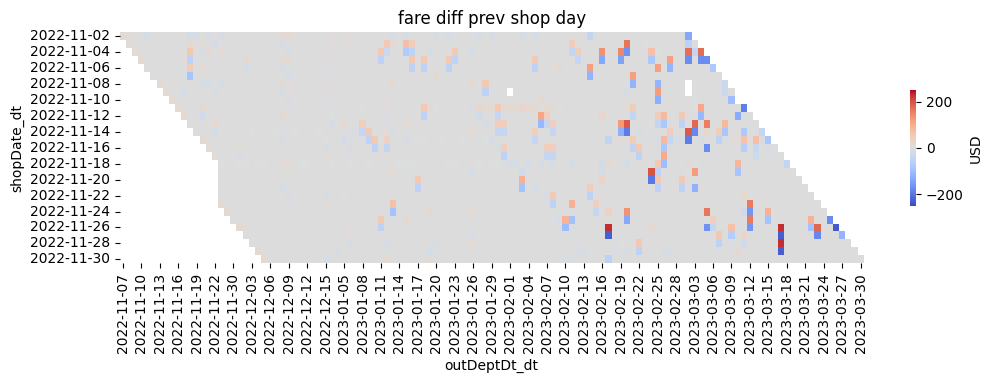

In [127]:
plt.figure(figsize=(12, 3))
v=250
pvt_data = market_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="fare_diff_prev_shop_day")
sns.heatmap(pvt_data, cmap='coolwarm', 
                cbar_kws={'label': 'USD', 'shrink': 0.5,},
            vmin=-v, vmax=v
                );
plt.title("fare diff prev shop day");

## SFO-LAX

In [128]:
market = 'SFO-LAX'
market_df = df[df['market'] == market]

In [129]:
market_df[['fare', 'abs_err', 'abs_pct_err']].describe()

,fare,abs_err,abs_pct_err
count,2747.000000,2747.000000,2747.000000
mean,52.378981,1.858727,0.031573
std,10.321940,3.776688,0.059824
min,39.860000,0.000321,0.000007
25%,48.600000,0.105585,0.002173
50%,48.600000,0.388888,0.007868
75%,48.600000,1.815600,0.032803
max,133.600000,33.473908,0.638080


In [130]:
x_bar =  market_df['fare'].mean()
sigma =  market_df['fare'].std()

market_df['zscore_fare'] = (market_df['fare'] - x_bar) / sigma

In [131]:
market_df.sort_values(by='abs_err', ascending=False)[
    ['shop_date', 'out_departure_date', 'days_til_dept',  'fare', 'zscore_fare', 'prediction', 'err', 'abs_pct_err',
    'shop_counts', 'out_cxrs']
].head(10)

,shop_date,out_departure_date,days_til_dept,fare,zscore_fare,prediction,err,abs_pct_err,shop_counts,out_cxrs
7106,20221108,20221118,10,68.60,1.571509,102.073908,-33.473908,0.487958,868,"[DL, B6, UA, AS]"
36745,20221107,20221215,38,48.60,-0.366111,79.610687,-31.010687,0.638080,632,[DL]
7662,20221126,20230326,120,68.60,1.571509,98.478049,-29.878049,0.435540,26,[B6]
7105,20221104,20221118,14,88.60,3.509129,60.576163,28.023837,0.316296,1257,[DL]
36332,20221102,20221118,16,48.60,-0.366111,75.708897,-27.108897,0.557796,2451,"[DL, B6, AS, UA]"
37897,20221121,20230220,91,48.60,-0.366111,75.681574,-27.081574,0.557234,63,"[DL, B6, UA, AS]"
38371,20221119,20230317,118,48.60,-0.366111,74.053455,-25.453455,0.523734,15,[DL]
36336,20221107,20221118,11,98.60,4.477939,74.149413,24.450587,0.247978,1073,[DL]
7508,20221111,20230219,100,78.59,2.539350,54.574562,24.015438,0.305579,21,"[DL, AS]"
36294,20221102,20221113,11,103.60,4.962344,79.835272,23.764728,0.229389,1152,[DL]


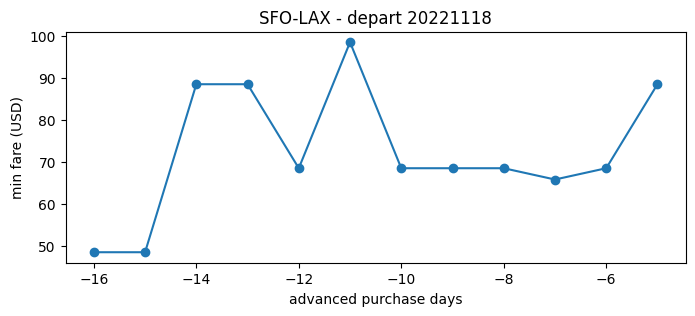

In [132]:
plot_min_fare(market_df, 20221118, market)

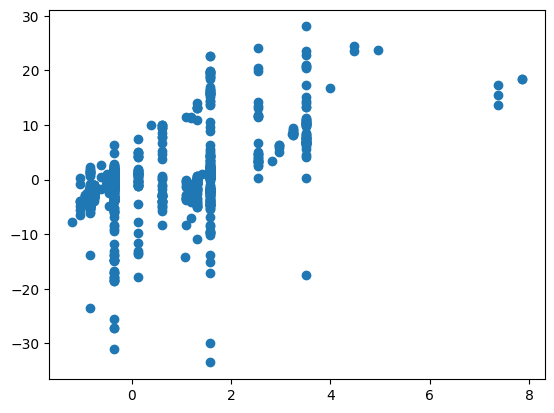

In [133]:
plt.scatter(market_df['zscore_fare'], market_df['err']);

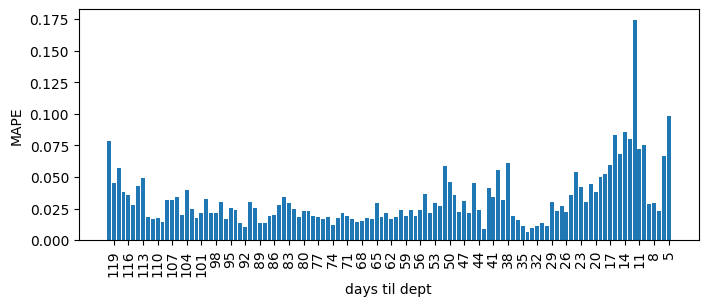

In [134]:
# error by DTD
# =================
dtd_errs = market_df.groupby("days_til_dept").agg(
    {"abs_err": ['mean', 'std'],
    "abs_pct_err": ['mean', 'std']
    })
dtd_errs.columns = ['mean_abs_err', 'std_abs_err', 'mape', 'std_ape']
dtd_errs.reset_index(inplace=True)

data_to_plot = dtd_errs.copy()

plt.figure(figsize=(8,3))
xs = np.arange(len(data_to_plot))
rev_xs = [-x for x in xs]
plt.bar(rev_xs, data_to_plot['mape'],) #yerr=data_df['std_ape_rf'])
every = 3
plt.xticks(rev_xs[::every], data_to_plot['days_til_dept'][::every], rotation=90)
plt.ylabel("MAPE")
plt.xlabel("days til dept");

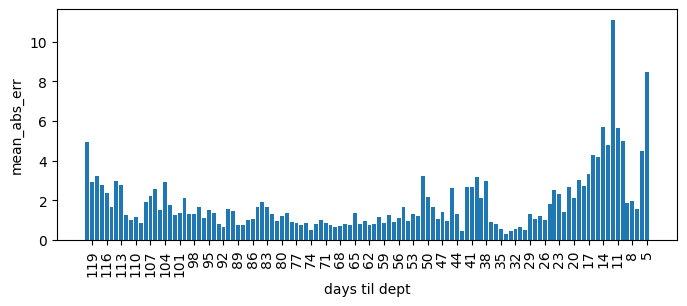

In [135]:
# break
plt.figure(figsize=(8,3))
xs = np.arange(len(data_to_plot))
rev_xs = [-x for x in xs]
plt.bar(rev_xs, data_to_plot['mean_abs_err'],) #yerr=data_df['std_ape_rf'])
every = 3
plt.xticks(rev_xs[::every], data_to_plot['days_til_dept'][::every], rotation=90)
plt.ylabel("mean_abs_err")
plt.xlabel("days til dept");

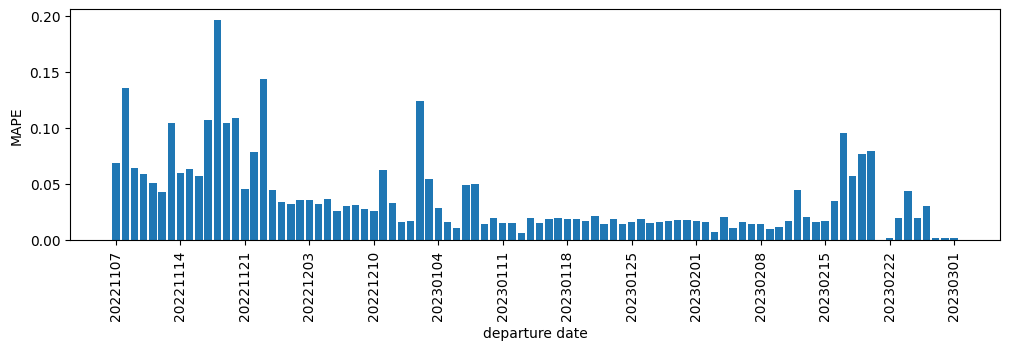

In [136]:
# ERROR BY DEPT DATE
dd_err = market_df.groupby("out_departure_date").agg(
    {"abs_err": ['mean', 'std'],
    "abs_pct_err": ['mean', 'std']
    })
     
dd_err.columns = ['mean_abs_err', 'std_abs_err', 'mape', 'std_ape']
dd_err.reset_index(inplace=True)

data_to_plot = dd_err[dd_err['out_departure_date'] <= 20230301]

plt.figure(figsize=(12,3))
xs = np.arange(len(data_to_plot))
plt.bar(xs, data_to_plot['mape'],) #yerr=data_df['std_ape_rf'])
every = 7
plt.xticks(xs[::every], data_to_plot['out_departure_date'][::every], rotation=90)
plt.ylabel("MAPE")
plt.xlabel("departure date");

In [137]:
# ERROR HEATMAP
max(market_df['err']), min(market_df['err'])

(28.023836981046365, -33.47390826308495)

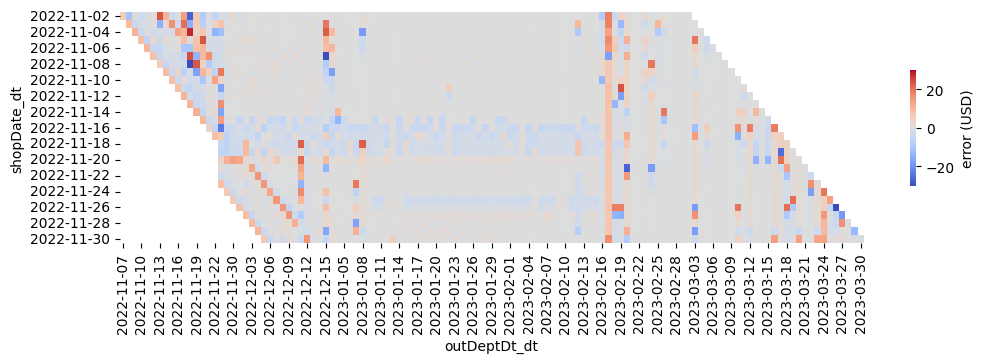

In [138]:
# break
v = 30
pvt_data = market_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="err")
plt.figure(figsize=(12, 3))
sns.heatmap(pvt_data, cmap='coolwarm', 
            cbar_kws={'label': 'error (USD)', 'shrink': 0.5},
            # adjust these based on above min/max
            vmin=-v, vmax=v,
                );

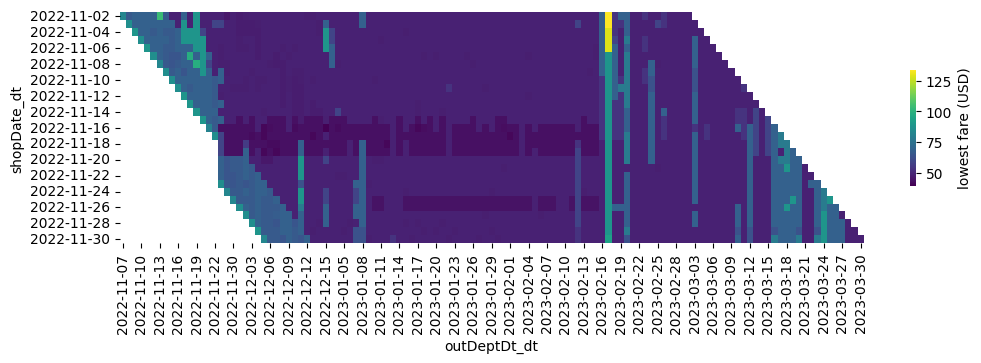

In [139]:
plt.figure(figsize=(12, 3))
pvt_data = market_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="fare")
sns.heatmap(pvt_data, cmap='viridis', #square=True,
                cbar_kws={'label': 'lowest fare (USD)',
                            'shrink': 0.5,
                            }
                );

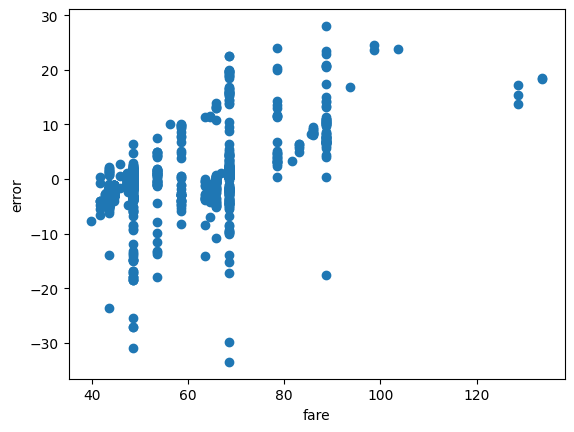

In [140]:
# CORR OF FARE & ERROR
plt.scatter(market_df['fare'], market_df['err']);
plt.xlabel("fare")
plt.ylabel("error");

In [141]:
np.corrcoef(market_df['fare'], market_df['err'])

array([[1.        , 0.49826752],
       [0.49826752, 1.        ]])

array([[1.        , 0.86050661],
       [0.86050661, 1.        ]])

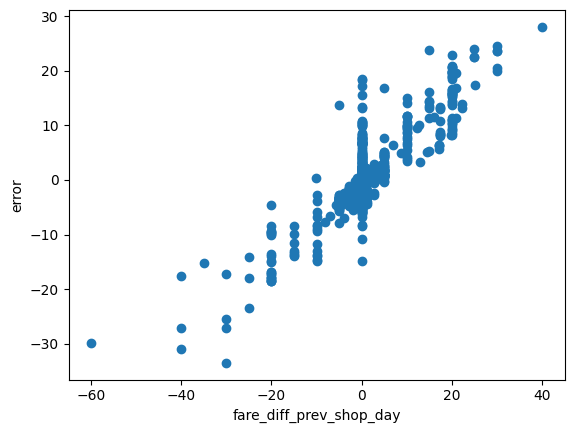

In [142]:
plt.scatter(market_df['fare_diff_prev_shop_day'], market_df['err']);
plt.xlabel("fare_diff_prev_shop_day")
plt.ylabel("error");
np.corrcoef(market_df['fare_diff_prev_shop_day'], market_df['err'])

In [143]:
market_df['fare_diff_prev_shop_day'].min(), market_df['fare_diff_prev_shop_day'].max()

(-60.0, 39.99999999999999)

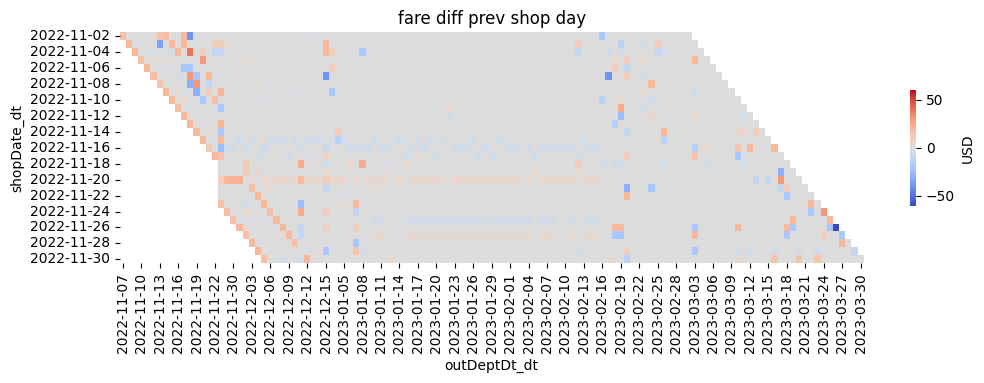

In [144]:
plt.figure(figsize=(12, 3))
v=60
pvt_data = market_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="fare_diff_prev_shop_day")
sns.heatmap(pvt_data, cmap='coolwarm', 
                cbar_kws={'label': 'USD', 'shrink': 0.5,},
            vmin=-v, vmax=v
                );
plt.title("fare diff prev shop day");

## LAX-JFK

In [145]:
market = 'LAX-JFK'
market_df = df[df['market'] == market]

In [146]:
market_df[['fare', 'abs_err', 'abs_pct_err']].describe()

,fare,abs_err,abs_pct_err
count,2747.000000,2747.000000,2747.000000
mean,141.018289,6.643128,0.043859
std,39.061419,9.508516,0.059986
min,89.600000,0.001200,0.000008
25%,108.600000,0.781141,0.005378
50%,128.600000,2.738236,0.019968
75%,160.600000,8.143467,0.058143
max,322.600000,70.130357,0.541523


In [147]:
x_bar =  market_df['fare'].mean()
sigma =  market_df['fare'].std()

market_df['zscore_fare'] = (market_df['fare'] - x_bar) / sigma

In [148]:
market_df.sort_values(by='abs_err', ascending=False)[
    ['out_departure_date', 'shop_date', 'days_til_dept', 'fare', 'zscore_fare', 'prediction', 'err',
    'shop_counts', 'shop_counts_prev_shop_day']
].head(10)

,out_departure_date,shop_date,days_til_dept,fare,zscore_fare,prediction,err,shop_counts,shop_counts_prev_shop_day
22609,20230226,20221111,107,287.10,3.739795,216.969643,70.130357,39,35
3333,20221128,20221117,11,138.60,-0.061910,208.578694,-69.978694,884,847
22902,20230312,20221115,117,251.60,2.830970,184.697587,66.902413,30,43
3365,20221204,20221122,12,225.19,2.154855,158.651442,66.538558,706,675
22607,20230226,20221109,109,281.60,3.598991,219.548915,62.051085,41,32
20898,20221118,20221105,13,273.60,3.394186,211.696100,61.903900,1081,1191
3346,20221130,20221125,5,226.60,2.190952,165.143989,61.456011,1098,841
23003,20230319,20221130,109,293.59,3.905944,233.453698,60.136302,24,37
22997,20230319,20221123,116,293.59,3.905944,234.454248,59.135752,53,74
22626,20230226,20221129,89,106.60,-0.881133,164.326397,-57.726397,138,193


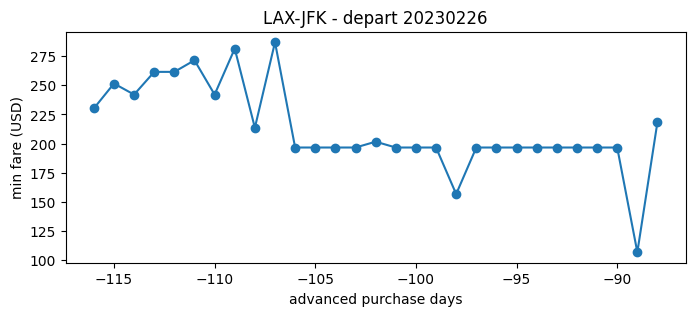

In [149]:
plot_min_fare(market_df, 20230226, market)

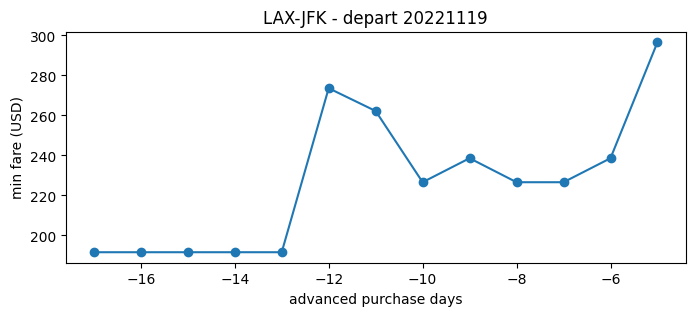

In [150]:
plot_min_fare(market_df, 20221119, market)

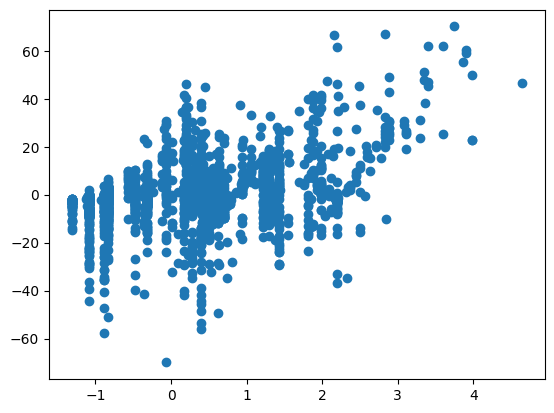

In [151]:
plt.scatter(market_df['zscore_fare'], market_df['err']);

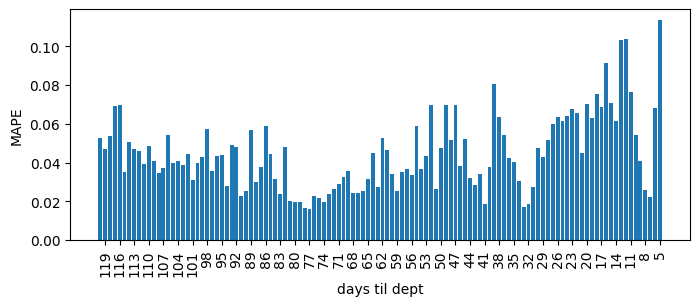

In [152]:
# error by DTD
# =================
dtd_errs = market_df.groupby("days_til_dept").agg(
    {"abs_err": ['mean', 'std'],
    "abs_pct_err": ['mean', 'std']
    })
dtd_errs.columns = ['mean_abs_err', 'std_abs_err', 'mape', 'std_ape']
dtd_errs.reset_index(inplace=True)

data_to_plot = dtd_errs.copy()

plt.figure(figsize=(8,3))
xs = np.arange(len(data_to_plot))
rev_xs = [-x for x in xs]
plt.bar(rev_xs, data_to_plot['mape'],) #yerr=data_df['std_ape_rf'])
every = 3
plt.xticks(rev_xs[::every], data_to_plot['days_til_dept'][::every], rotation=90)
plt.ylabel("MAPE")
plt.xlabel("days til dept");

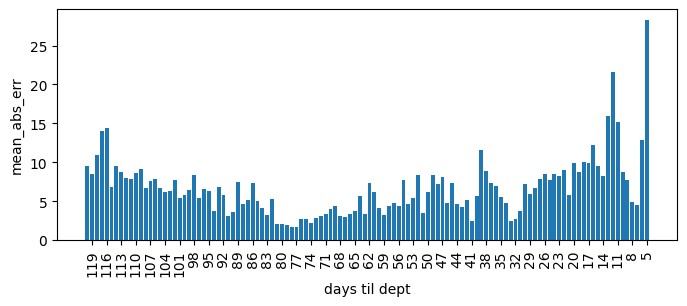

In [153]:
# break
plt.figure(figsize=(8,3))
xs = np.arange(len(data_to_plot))
rev_xs = [-x for x in xs]
plt.bar(rev_xs, data_to_plot['mean_abs_err'],) #yerr=data_df['std_ape_rf'])
every = 3
plt.xticks(rev_xs[::every], data_to_plot['days_til_dept'][::every], rotation=90)
plt.ylabel("mean_abs_err")
plt.xlabel("days til dept");

Might want to clip DTD a bit more aggressively, but otherwise picking up that trend

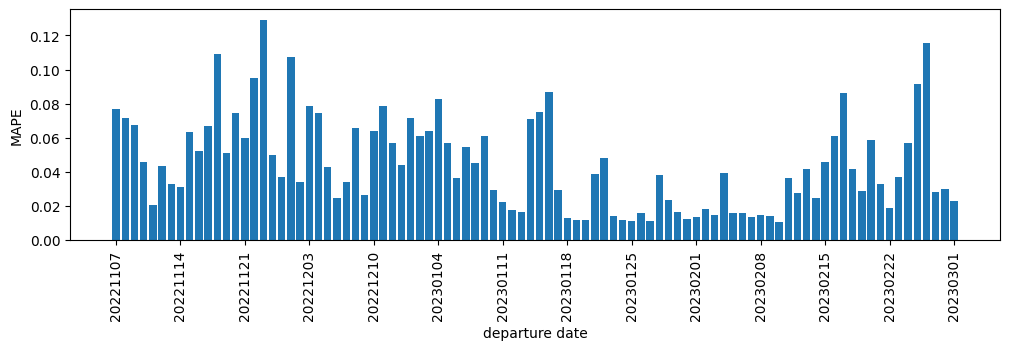

In [154]:
# ERROR BY DEPT DATE
dd_err = market_df.groupby("out_departure_date").agg(
    {"abs_err": ['mean', 'std'],
    "abs_pct_err": ['mean', 'std']
    })
     
dd_err.columns = ['mean_abs_err', 'std_abs_err', 'mape', 'std_ape']
dd_err.reset_index(inplace=True)

data_to_plot = dd_err[dd_err['out_departure_date'] <= 20230301]

plt.figure(figsize=(12,3))
xs = np.arange(len(data_to_plot))
plt.bar(xs, data_to_plot['mape'],) #yerr=data_df['std_ape_rf'])
every = 7
plt.xticks(xs[::every], data_to_plot['out_departure_date'][::every], rotation=90)
plt.ylabel("MAPE")
plt.xlabel("departure date");

In [155]:
# ERROR HEATMAP
max(market_df['err']), min(market_df['err'])

(70.13035670365198, -69.97869380830682)

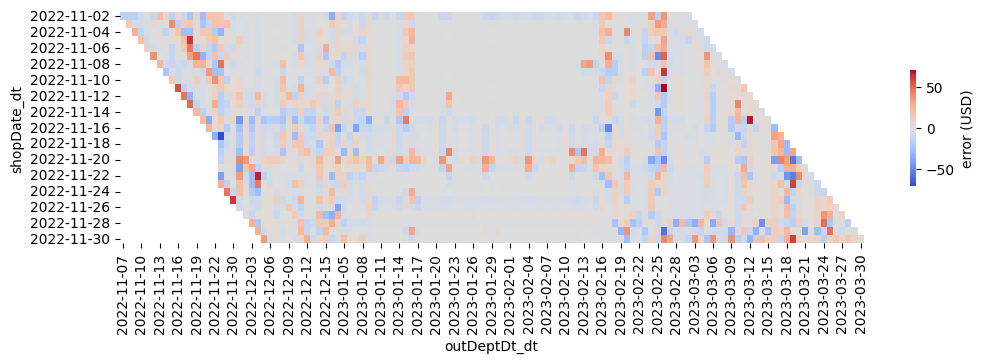

In [156]:
# break
v = 70
pvt_data = market_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="err")
plt.figure(figsize=(12, 3))
sns.heatmap(pvt_data, cmap='coolwarm', 
            cbar_kws={'label': 'error (USD)', 'shrink': 0.5},
            # adjust these based on above min/max
            vmin=-v, vmax=v,
                );

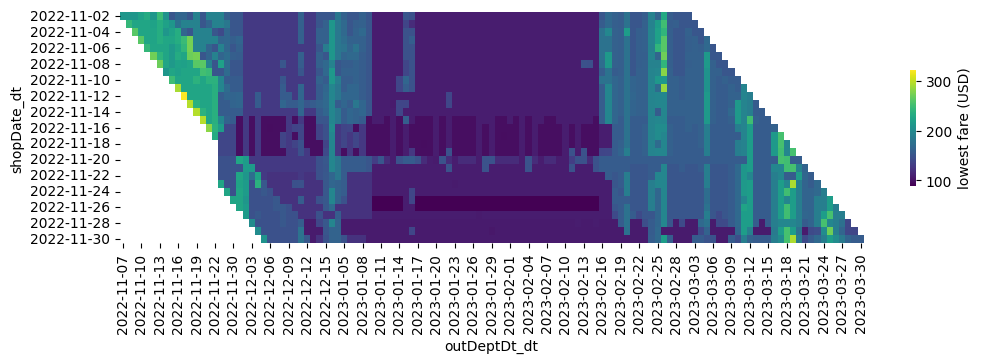

In [157]:
plt.figure(figsize=(12, 3))
pvt_data = market_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="fare")
sns.heatmap(pvt_data, cmap='viridis', #square=True,
                cbar_kws={'label': 'lowest fare (USD)',
                            'shrink': 0.5,
                            }
                );

Interesting: see higher fares within ~10 days of departure, pre-Thanksgiving

array([[1.        , 0.36936831],
       [0.36936831, 1.        ]])

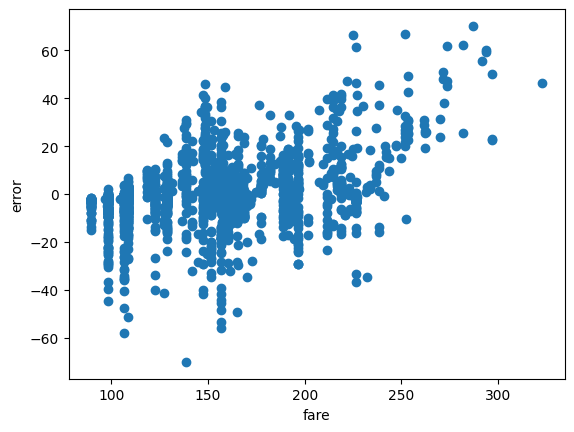

In [158]:
plt.scatter(market_df['fare'], market_df['err']);
plt.xlabel("fare")
plt.ylabel("error");

np.corrcoef(market_df['fare'], market_df['err'])

array([[1.        , 0.76399018],
       [0.76399018, 1.        ]])

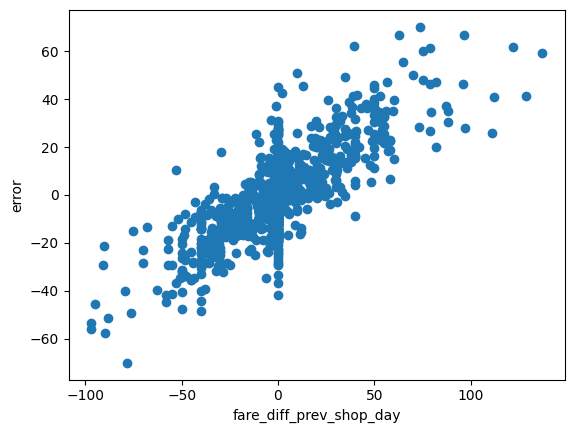

In [159]:
plt.scatter(market_df['fare_diff_prev_shop_day'], market_df['err']);
plt.xlabel("fare_diff_prev_shop_day")
plt.ylabel("error");
np.corrcoef(market_df['fare_diff_prev_shop_day'], market_df['err'])

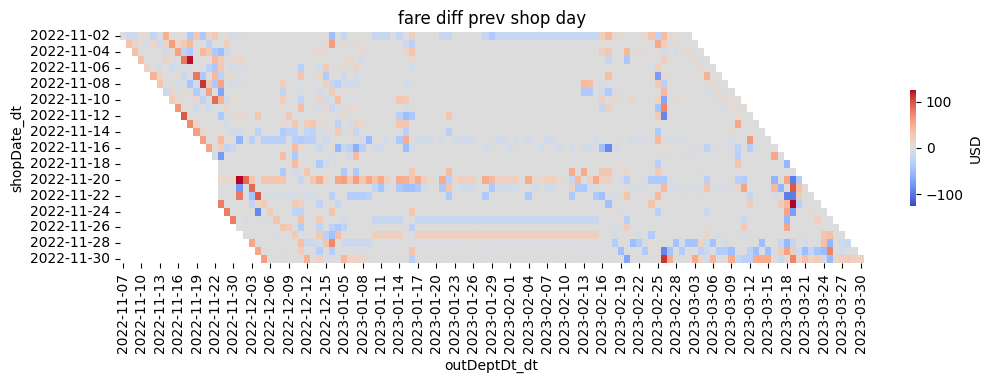

In [160]:
plt.figure(figsize=(12, 3))
v=125
pvt_data = market_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="fare_diff_prev_shop_day")
sns.heatmap(pvt_data, cmap='coolwarm', 
                cbar_kws={'label': 'USD', 'shrink': 0.5,},
            vmin=-v, vmax=v
                );
plt.title("fare diff prev shop day");

## EWR-CDG

In [161]:
market = 'EWR-CDG'
market_df = df[df['market'] == market]

In [162]:
market_df[['fare', 'abs_err', 'abs_pct_err']].describe()

,fare,abs_err,abs_pct_err
count,2747.000000,2747.000000,2747.000000
mean,397.691187,7.717465,0.017644
std,72.428748,14.373092,0.029952
min,359.100000,0.017714,0.000034
25%,364.000000,2.421509,0.006531
50%,369.500000,3.151109,0.008436
75%,369.700000,6.751496,0.018056
max,845.700000,184.419777,0.462672


In [163]:
x_bar =  market_df['fare'].mean()
sigma =  market_df['fare'].std()

market_df['zscore_fare'] = (market_df['fare'] - x_bar) / sigma

market_df.sort_values(by='abs_err', ascending=False)[
    ['out_departure_date', 'shop_date', 'days_til_dept', 'fare', 'zscore_fare', 'prediction', 'err',
    'shop_counts', 'out_cxrs']
].head(10)

,out_departure_date,shop_date,days_til_dept,fare,zscore_fare,prediction,err,shop_counts,out_cxrs
960,20230217,20221126,83,553.3,2.148440,368.880223,184.419777,228,[DL]
670,20221214,20221111,33,368.9,-0.397510,539.579725,-170.679725,461,[SK]
1043,20230304,20221126,98,516.2,1.636212,365.932495,150.267505,103,[FI]
10444,20230106,20221118,49,369.6,-0.387846,505.234907,-135.634907,592,[SK]
698,20230106,20221114,53,504.1,1.469152,376.190139,127.909861,592,[FI]
662,20221212,20221126,16,369.4,-0.390607,485.092852,-115.692852,1318,[SK]
567,20221118,20221112,6,759.9,5.000898,646.355038,113.544962,1041,[SK]
10611,20230113,20221128,46,504.3,1.471913,392.819266,111.480734,760,[FI]
1044,20230304,20221127,97,364.2,-0.462402,465.353143,-101.153143,214,[SK]
686,20230104,20221106,59,368.5,-0.403033,462.586646,-94.086646,318,[SK]


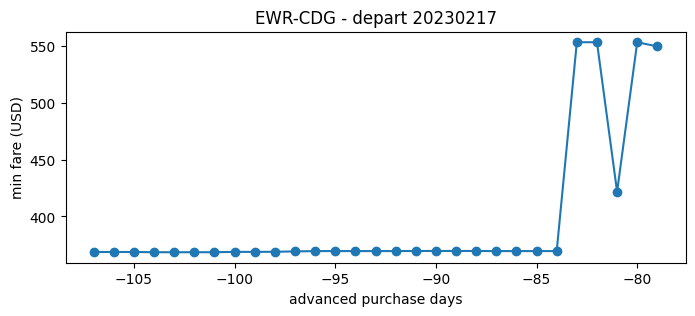

In [164]:
plot_min_fare(market_df, 20230217, market)

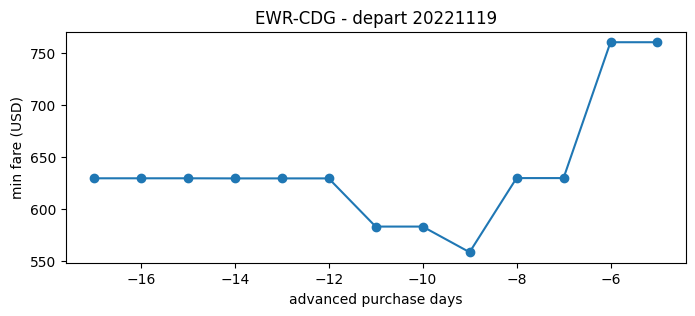

In [165]:
plot_min_fare(market_df, 20221119, market)

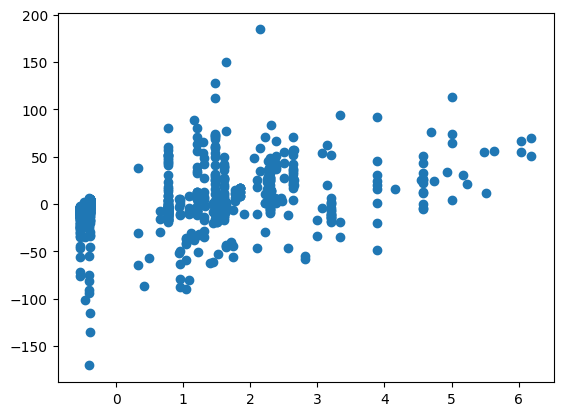

In [166]:
plt.scatter(market_df['zscore_fare'], market_df['err']);

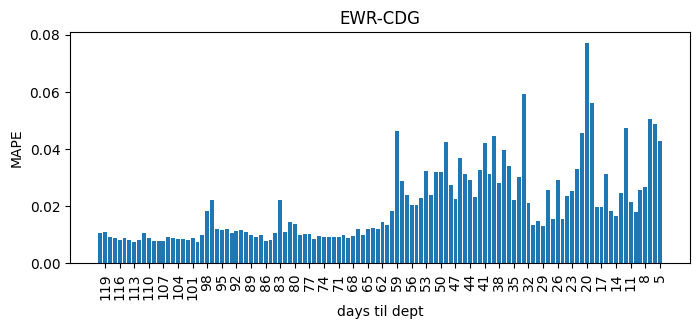

In [167]:
dtd_errs = market_df.groupby("days_til_dept").agg(
    {"abs_err": ['mean', 'std'],
    "abs_pct_err": ['mean', 'std']
    })
dtd_errs.columns = ['mean_abs_err', 'std_abs_err', 'mape', 'std_ape']
dtd_errs.reset_index(inplace=True)

dtd_lim = 120
data_to_plot = dtd_errs[dtd_errs['days_til_dept'] <= dtd_lim]

plt.figure(figsize=(8,3))
xs = np.arange(len(data_to_plot))
rev_xs = [-x for x in xs]
plt.bar(rev_xs, data_to_plot['mape'],) #yerr=data_df['std_ape_rf'])
every = 3
plt.xticks(rev_xs[::every], data_to_plot['days_til_dept'][::every], rotation=90)
plt.ylabel("MAPE")
plt.xlabel("days til dept");
plt.title(market);

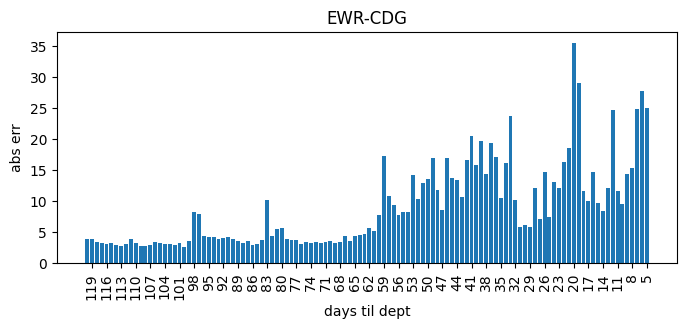

In [168]:
plt.figure(figsize=(8,3))
xs = np.arange(len(data_to_plot))
rev_xs = [-x for x in xs]
plt.bar(rev_xs, data_to_plot['mean_abs_err']) #, yerr=data_to_plot['std_abs_err'])
every = 3
plt.xticks(rev_xs[::every], data_to_plot['days_til_dept'][::every], rotation=90)
plt.ylabel("abs err")
plt.xlabel("days til dept");
plt.title(market);

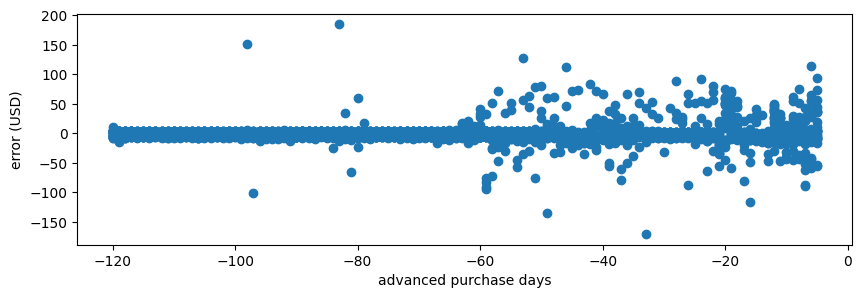

In [169]:
plt.figure(figsize=(10, 3))
plt.scatter(-market_df['days_til_dept'], market_df['err']);
plt.xlabel("advanced purchase days");
plt.ylabel("error (USD)");

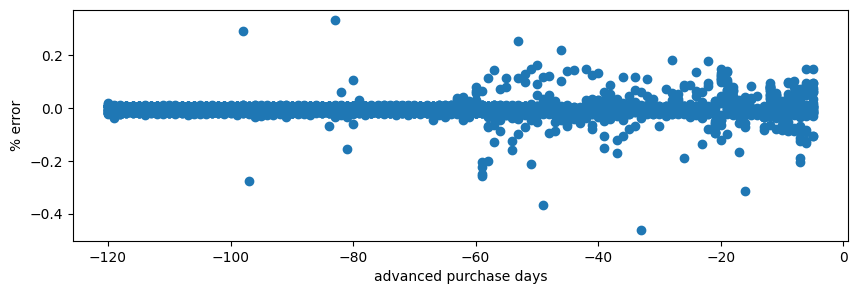

In [170]:
plt.figure(figsize=(10, 3))
plt.scatter(-market_df['days_til_dept'], market_df['pct_err']);
plt.xlabel("advanced purchase days");
plt.ylabel("% error");

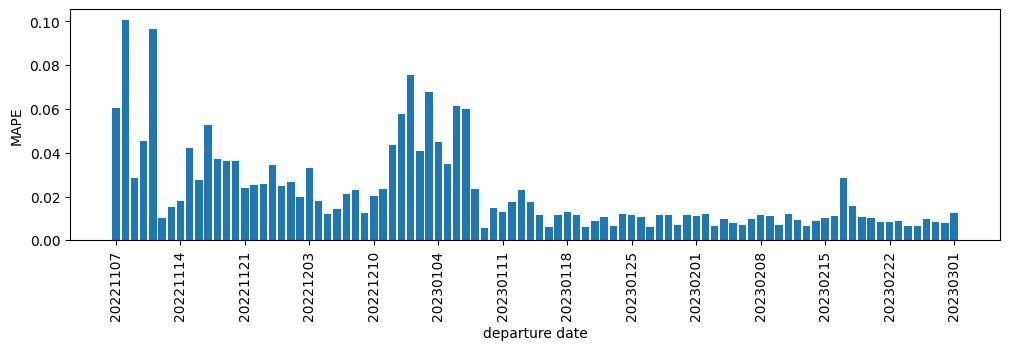

In [171]:

# ERROR BY DEPT DATE
dd_err = market_df.groupby("out_departure_date").agg(
    {"abs_err": ['mean', 'std'],
    "abs_pct_err": ['mean', 'std']
    })
     
dd_err.columns = ['mean_abs_err', 'std_abs_err', 'mape', 'std_ape']
dd_err.reset_index(inplace=True)

data_to_plot = dd_err[dd_err['out_departure_date'] <= 20230301]

plt.figure(figsize=(12,3))
xs = np.arange(len(data_to_plot))
plt.bar(xs, data_to_plot['mape'],) #yerr=data_df['std_ape_rf'])
every = 7
plt.xticks(xs[::every], data_to_plot['out_departure_date'][::every], rotation=90)
plt.ylabel("MAPE")
plt.xlabel("departure date");


In [172]:
# ERROR HEATMAP
max(market_df['err']), min(market_df['err'])

(184.4197766904947, -170.6797251248122)

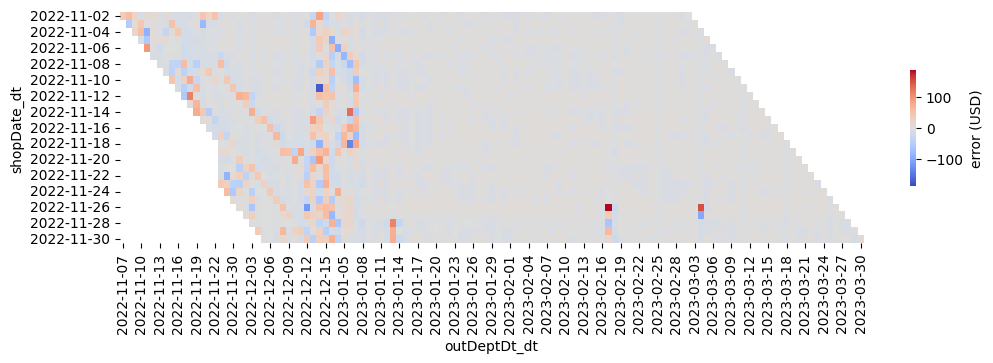

In [173]:
# break
v = 185
pvt_data = market_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="err")
plt.figure(figsize=(12, 3))
sns.heatmap(pvt_data, cmap='coolwarm', 
            cbar_kws={'label': 'error (USD)', 'shrink': 0.5},
            # adjust these based on above min/max
            vmin=-v, vmax=v,
                );

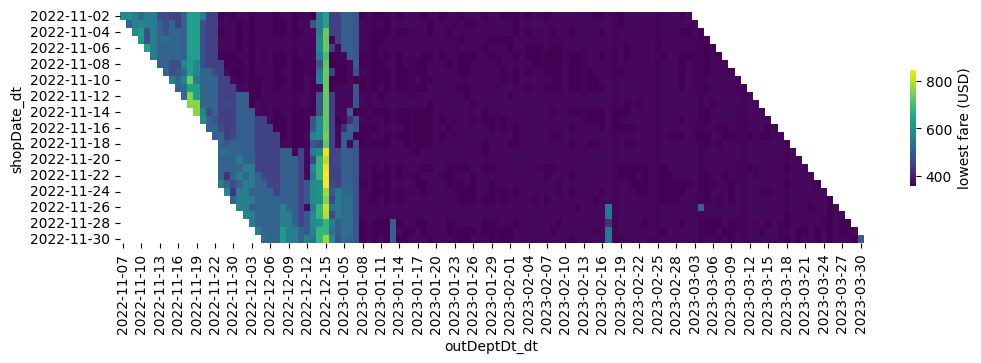

In [174]:
plt.figure(figsize=(12, 3))
pvt_data = market_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="fare")
sns.heatmap(pvt_data, cmap='viridis', #square=True,
                cbar_kws={'label': 'lowest fare (USD)',
                            'shrink': 0.5,
                            }
                );

array([[1.        , 0.30879847],
       [0.30879847, 1.        ]])

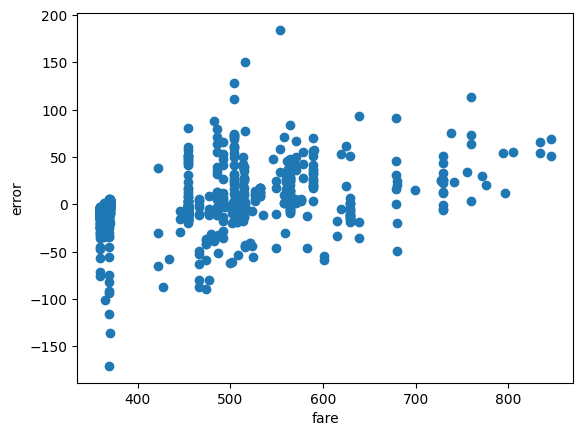

In [175]:
plt.scatter(market_df['fare'], market_df['err']);
plt.xlabel("fare")
plt.ylabel("error");

np.corrcoef(market_df['fare'], market_df['err'])

array([[1.        , 0.82333341],
       [0.82333341, 1.        ]])

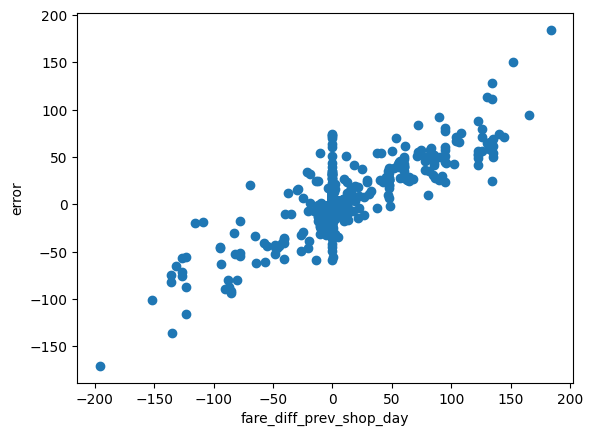

In [176]:
plt.scatter(market_df['fare_diff_prev_shop_day'], market_df['err']);
plt.xlabel("fare_diff_prev_shop_day")
plt.ylabel("error");
np.corrcoef(market_df['fare_diff_prev_shop_day'], market_df['err'])

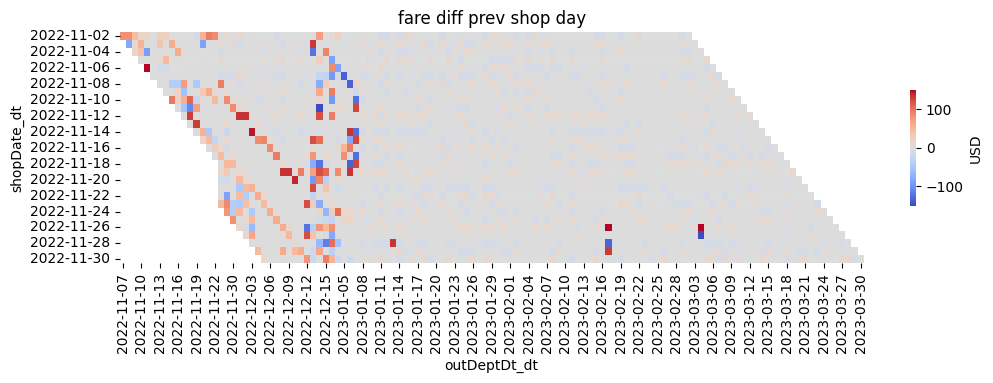

In [177]:
plt.figure(figsize=(12, 3))
v=150
pvt_data = market_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="fare_diff_prev_shop_day")
sns.heatmap(pvt_data, cmap='coolwarm', 
                cbar_kws={'label': 'USD', 'shrink': 0.5,},
            vmin=-v, vmax=v
                );
plt.title("fare diff prev shop day");

## XXX-XXX

In [ ]:
market = 'XXX-XXX'
market_df = df[df['market'] == market]

In [ ]:
market_df[['fare', 'abs_err', 'abs_pct_err']].describe()

In [ ]:
x_bar =  market_df['fare'].mean()
sigma =  market_df['fare'].std()

market_df['zscore_fare'] = (market_df['fare'] - x_bar) / sigma

In [ ]:
market_df.sort_values(by='abs_err', ascending=False)[
    ['out_departure_date', 'shop_date', 'days_til_dept', 'fare', 'zscore_fare', 'prediction', 'err',
    'shop_counts', 'shop_counts_prev_shop_day']
].head(10)

In [ ]:
plot_min_fare(market_df, 20230226, market)

In [ ]:
plot_min_fare(market_df, 20221119, market)

In [ ]:
plt.scatter(market_df['zscore_fare'], market_df['err']);

In [ ]:
# error by DTD
# =================
dtd_errs = market_df.groupby("days_til_dept").agg(
    {"abs_err": ['mean', 'std'],
    "abs_pct_err": ['mean', 'std']
    })
dtd_errs.columns = ['mean_abs_err', 'std_abs_err', 'mape', 'std_ape']
dtd_errs.reset_index(inplace=True)

data_to_plot = dtd_errs.copy()

plt.figure(figsize=(8,3))
xs = np.arange(len(data_to_plot))
rev_xs = [-x for x in xs]
plt.bar(rev_xs, data_to_plot['mape'],) #yerr=data_df['std_ape_rf'])
every = 3
plt.xticks(rev_xs[::every], data_to_plot['days_til_dept'][::every], rotation=90)
plt.ylabel("MAPE")
plt.xlabel("days til dept");

In [ ]:
# break
plt.figure(figsize=(8,3))
xs = np.arange(len(data_to_plot))
rev_xs = [-x for x in xs]
plt.bar(rev_xs, data_to_plot['mean_abs_err'],) #yerr=data_df['std_ape_rf'])
every = 3
plt.xticks(rev_xs[::every], data_to_plot['days_til_dept'][::every], rotation=90)
plt.ylabel("mean_abs_err")
plt.xlabel("days til dept");

In [ ]:
# ERROR BY DEPT DATE
dd_err = market_df.groupby("out_departure_date").agg(
    {"abs_err": ['mean', 'std'],
    "abs_pct_err": ['mean', 'std']
    })
     
dd_err.columns = ['mean_abs_err', 'std_abs_err', 'mape', 'std_ape']
dd_err.reset_index(inplace=True)

data_to_plot = dd_err[dd_err['out_departure_date'] <= 20230301]

plt.figure(figsize=(12,3))
xs = np.arange(len(data_to_plot))
plt.bar(xs, data_to_plot['mape'],) #yerr=data_df['std_ape_rf'])
every = 7
plt.xticks(xs[::every], data_to_plot['out_departure_date'][::every], rotation=90)
plt.ylabel("MAPE")
plt.xlabel("departure date");

In [ ]:
# ERROR HEATMAP
max(market_df['err']), min(market_df['err'])

In [ ]:
# break
v = 70
pvt_data = market_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="err")
plt.figure(figsize=(12, 3))
sns.heatmap(pvt_data, cmap='coolwarm', 
            cbar_kws={'label': 'error (USD)', 'shrink': 0.5},
            # adjust these based on above min/max
            vmin=-v, vmax=v,
                );

In [ ]:
plt.figure(figsize=(12, 3))
pvt_data = market_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="fare")
sns.heatmap(pvt_data, cmap='viridis', #square=True,
                cbar_kws={'label': 'lowest fare (USD)',
                            'shrink': 0.5,
                            }
                );

In [ ]:
plt.scatter(market_df['fare'], market_df['err']);
plt.xlabel("fare")
plt.ylabel("error");

np.corrcoef(market_df['fare'], market_df['err'])

In [ ]:
plt.scatter(market_df['fare_diff_prev_shop_day'], market_df['err']);
plt.xlabel("fare_diff_prev_shop_day")
plt.ylabel("error");
np.corrcoef(market_df['fare_diff_prev_shop_day'], market_df['err'])

In [ ]:
plt.figure(figsize=(12, 3))
v=125
pvt_data = market_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="fare_diff_prev_shop_day")
sns.heatmap(pvt_data, cmap='coolwarm', 
                cbar_kws={'label': 'USD', 'shrink': 0.5,},
            vmin=-v, vmax=v
                );
plt.title("fare diff prev shop day");